In [1]:
import os

# Set the PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT environment variable to 0.6 seconds
# os.environ['PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT'] = '0.7'

import torch
import matplotlib.pyplot as plt
import networkx as nx
import collections

from copy import deepcopy

# local
import optimization_utils as ou

import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')


from datasets.import_dataset import import_dataset
from trainer import Trainer
from utils.plotting import *
from utils import utils
from utils import utils_pyg as up
import datasets.simulations as sim
import link_prediction as lp





device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device = {device}')


%load_ext autoreload
%autoreload 2

device = cuda


# Grid search params


## VANILLA

### texas iegam

In [ ]:
#ieclam

dim_feats = [22, 20, 24]
l1_regs = [1, 0.9, 1.1]
s_regs = [0.0], 0.01
n_iters_feat = [2000]
lr_feats = [4e-6]

range_triplets = [
    ['clamiter_init', 'dim_feat', dim_feats],
    ['clamiter_init','s_reg', s_regs],
    ['clamiter_init','l1_reg', l1_regs],
    ['feat_opt','n_iter', n_iters_feat],
    ['feat_opt','lr', lr_feats]
]
#todo: how to default without the range triplets? if i just want to make optimization for many iterations on the mighty or the specialized?

#todo: why is the l1 reg not working
# Create the file if it doesn't exist
ds_name = 'texas'
model_name = 'ieclam'
global_config_base = True
densify = False
attr_opt = False
test_p = 0.0
val_p = 0.1

ou.cross_val_link(
    ds_name,
    model_name=model_name,
    range_triplets=range_triplets,
    global_config_base=global_config_base,
    densify=densify,
    attr_opt=attr_opt,
    test_p=test_p,
    val_p=val_p,
    device=device,
    n_reps=10,
    plot_every=-1
    )

#todo: maybe try to optimize with small learning rate at the beginning? maybe the prior will just take care of it....
#todo: also use node attributes!! for sparse graphs they are important




/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-12-22 20:59:54 starting optimization of iegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 22,
        "s_reg": [
            0.0
        ],
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 4e-06,
        "n_iter": 2000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/optimization_utils.py:301:::  

Finished CrossVal!




TypeError: only integer tensors of a single element can be converted to an index

## PClam



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:05:22 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_forth": 7,
        "scheduler_step_size": 1000,
        "scheduler_gamma": 0.5,
        "early_stop_fit": 0,
        "first_func_in_fit": "fit_prior"
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:541:::  
in fit,
first_func_in_fit='fit_prior'
second_function_name='fit_feats'


/home/user/Doc

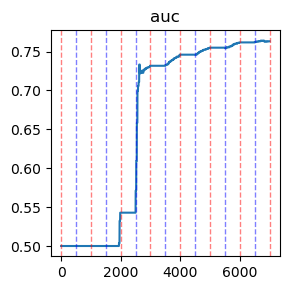



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7632267143461702


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:07:37 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

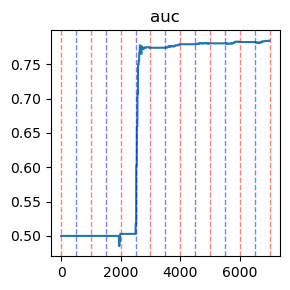



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7845978527295809


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:09:52 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

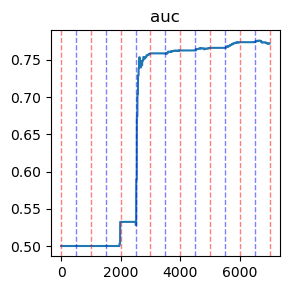



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.771690531527719


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:12:05 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_fo

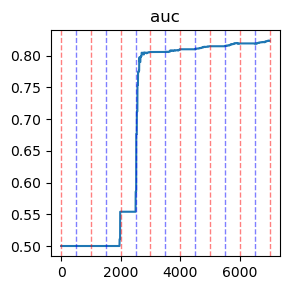



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8231082209056285


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:14:20 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

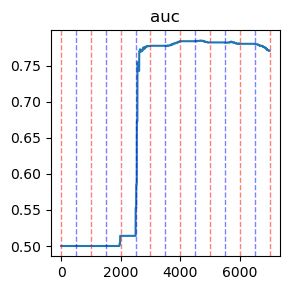



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7706325543800255


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:16:35 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

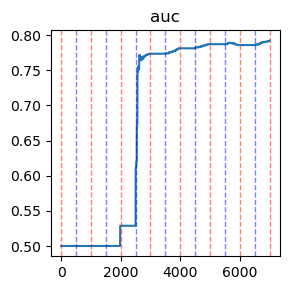



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7922152881929752


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:18:49 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

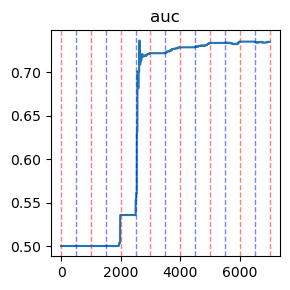



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7350845222175201


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:21:04 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

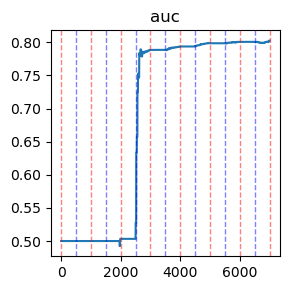



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8025834642403725


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:23:19 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

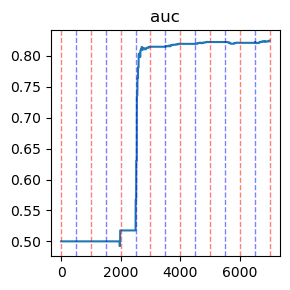



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8245893889123995


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:25:35 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

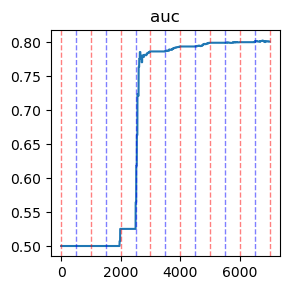



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8008907008040628


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:27:50 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

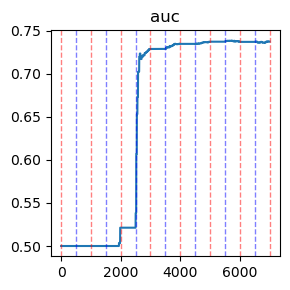



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7374120719424461


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:30:05 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

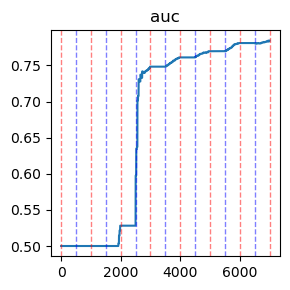



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7843862573000424


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:32:20 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

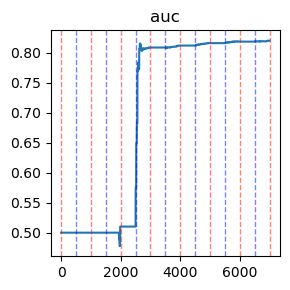



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8201458848920865


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:34:35 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

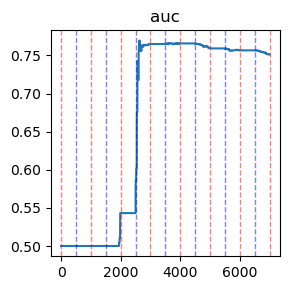



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.751165774862463


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:36:50 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

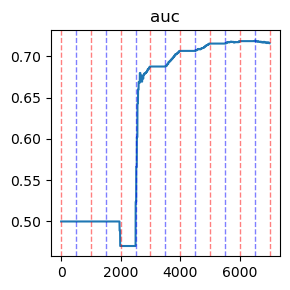



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7160409335590352


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:39:04 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

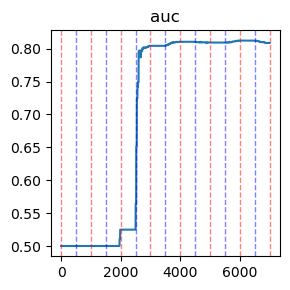



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8087197316969954


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:41:19 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

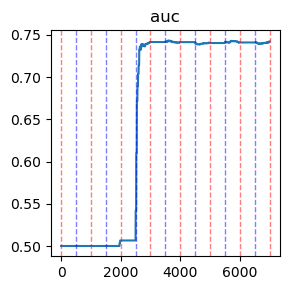



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7422787668218367


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:43:33 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

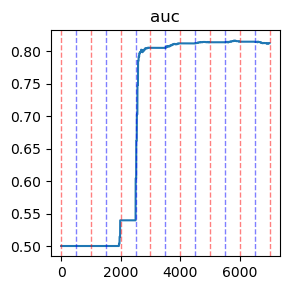



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8125284494286924


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:45:49 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

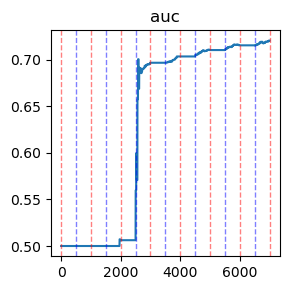



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7206960330088871


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:48:03 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

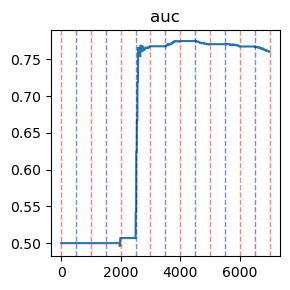



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7606875691917055


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:50:18 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

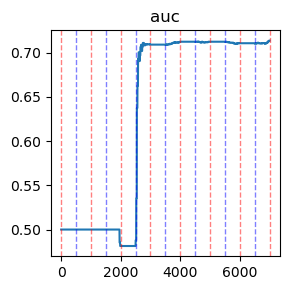



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7137133838341092


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:52:33 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

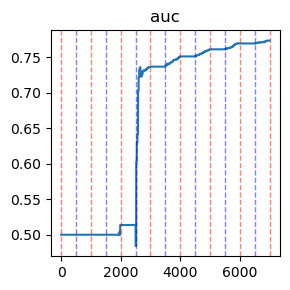



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7735948903935675


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:54:48 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

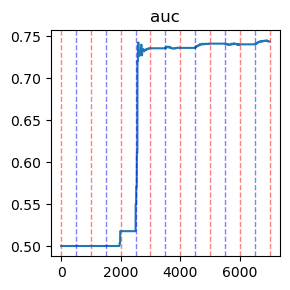



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7435483393990691


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:57:05 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

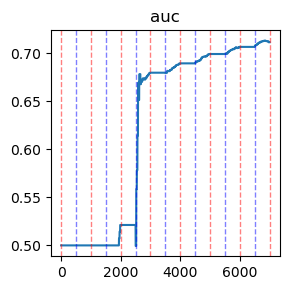



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7115974295387221


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:59:21 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

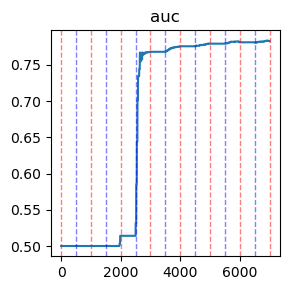



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7824818984341939


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:01:36 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

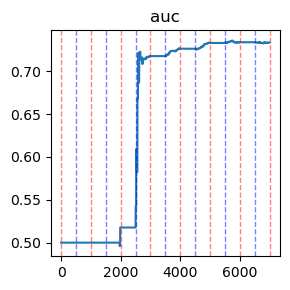



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7333917587812103


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:03:51 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

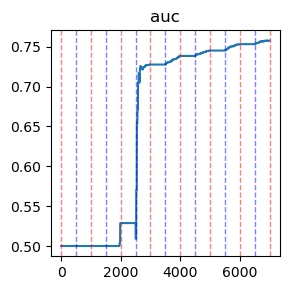



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7577252331781635


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:06:07 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

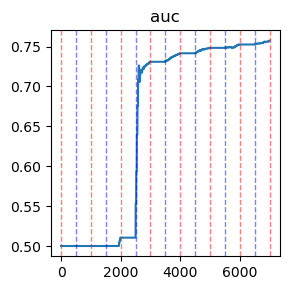



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7575136377486246


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:08:21 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

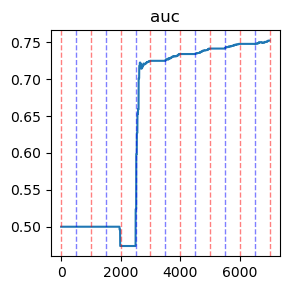



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7522237520101566


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:10:37 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

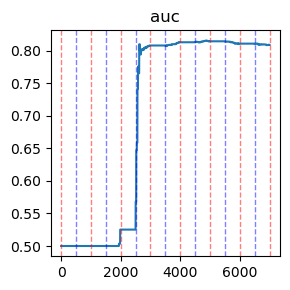



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8087197316969954


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:12:52 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

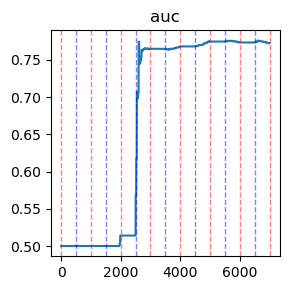



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7725369132458739


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:15:07 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

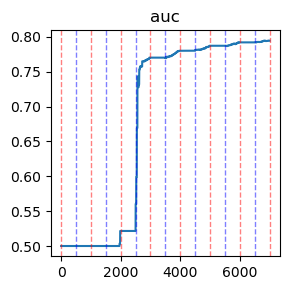



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.794542837917901


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:17:22 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

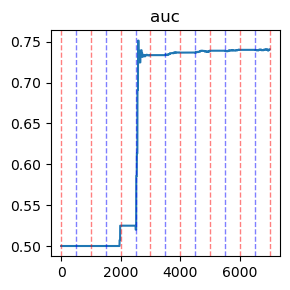



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7405860033855269


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:19:37 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

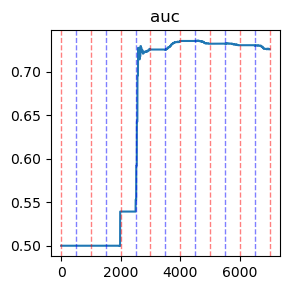



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7257743233178163


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:21:53 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

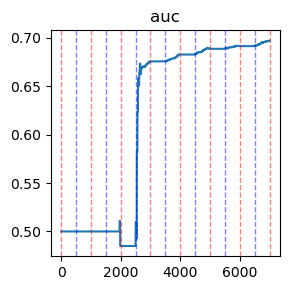



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6969973449005502


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:24:09 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

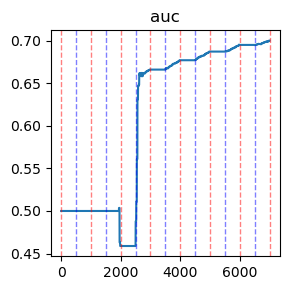



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.700171276343631


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:26:23 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

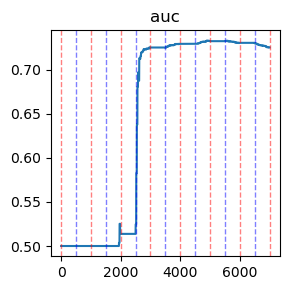



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7251395370292002


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:28:38 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

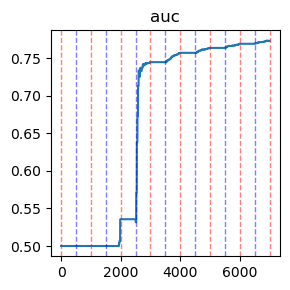



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7729601041049515


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:30:54 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

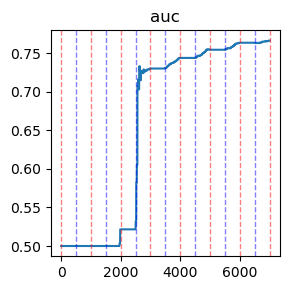



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7661890503597123


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:33:08 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

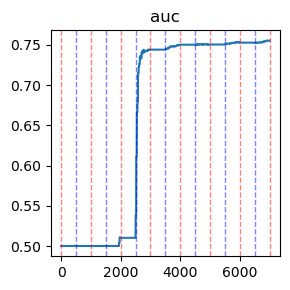



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7549744925941599


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:35:21 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

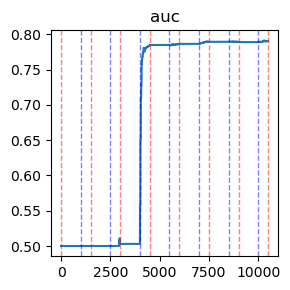



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7903109293271265


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:38:33 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

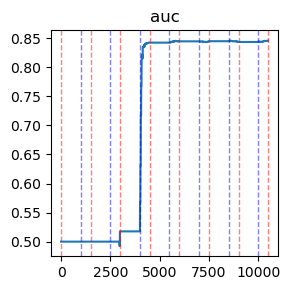



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8459605272958105


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:41:45 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

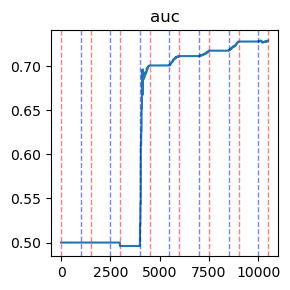



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7291598501904359


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:44:57 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

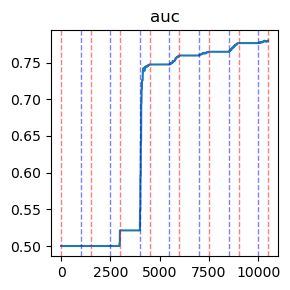



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7799427532797292


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:48:09 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

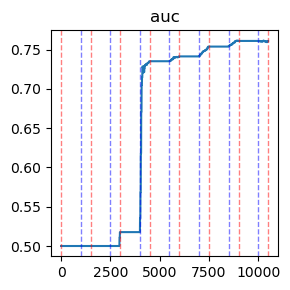



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7608991646212443


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:51:20 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

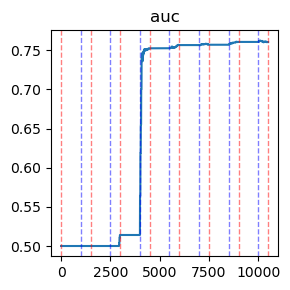



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7604759737621668


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:54:32 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

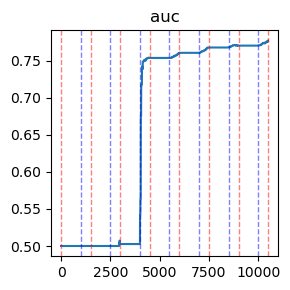



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7771920126957258


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 20:57:47 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

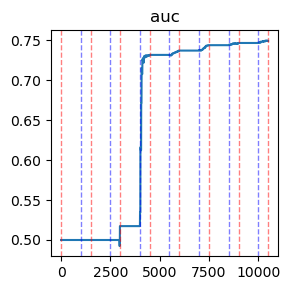



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7488382251375371


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 21:01:00 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

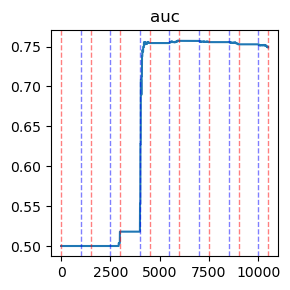



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7490498205670757


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 21:04:11 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

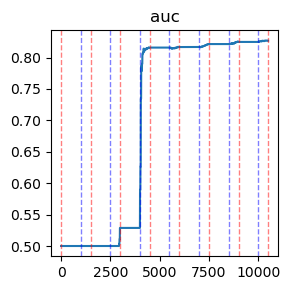



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8267053432077868


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 21:07:25 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

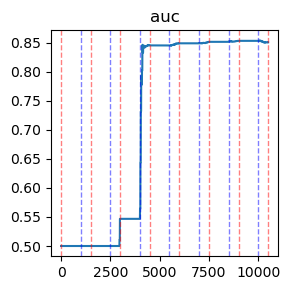



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8506156267456623


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 21:10:39 starting optimization of pclam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 66,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

In [15]:

# dim_feats = [36, 40, 46, 50, 56, 60, 66, 70, 76, 80]
dim_feats = [66]
l1_regs = [1, 0.01]

s_regs = [0.0]
n_iters_feats = [500, 1000, 1300]
lr_feats = [3e-6, 5e-6]


n_iters_prior = [500, 1000, 1300]
lr_prior = [1e-6, 3e-6]
noise_amps = [0.1, 0.05]

scheduler_step_sizes = [1000]
n_back_forths = [7]

range_triplets = [
    ['clamiter_init', 'dim_feat', dim_feats],
    ['clamiter_init','s_reg', s_regs],
    ['clamiter_init','l1_reg', l1_regs],
    ['feat_opt','n_iter', n_iters_feats],
    ['feat_opt','lr', lr_feats],

    ['prior_opt','n_iter', n_iters_prior],
    ['prior_opt','lr', lr_prior],
    ['prior_opt','noise_amp', noise_amps],

    ['back_forth', 'scheduler_step_size', scheduler_step_sizes],
    ['back_forth', 'n_back_forth', n_back_forths],
    ['back_forth', 'first_func_in_fit', ['fit_prior']]
]
#todo: how to default without the range triplets? if i just want to make optimization for many iterations on the mighty or the specialized?

#todo: why is the l1 reg not working
# Create the file if it doesn't exist
ds_name = 'texas'
model_name = 'pclam'
global_config_base = True
densify = False
attr_opt = False #! TRY WITHOUT ATTRIBUTES!!!!
test_p = 0.1
val_p = 0.0

ou.cross_val_link(
    ds_name,
    model_name=model_name,
    range_triplets=range_triplets,
    global_config_base=global_config_base,
    densify=densify,
    attr_opt=attr_opt,
    test_p=test_p,
    val_p=val_p,
    device=device,
    n_reps=10,
    plot_every=-1
    )

# 
#todo: more prior iterations, less noise amp. more power to prior in general!!

## piegam



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 17:21:44 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_forth": 7,
        "scheduler_step_size": 1000,
        "scheduler_gamma": 0.5,
        "early_stop_fit": 0,
        "first_func_in_fit": "fit_prior"
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:541:::  
in fit,
first_func_in_fit='fit_prior'
second_function_name='fit_feats'


/home/user/

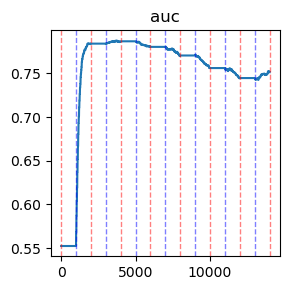



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7514008808952839


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 17:26:13 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

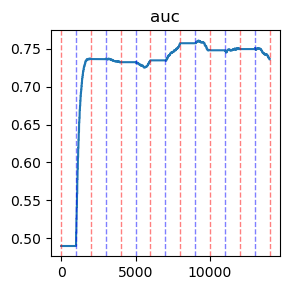



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7362130311750601


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 17:30:41 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

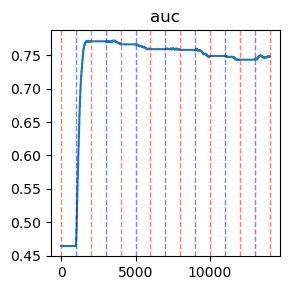



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7479369853450574


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 17:35:09 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

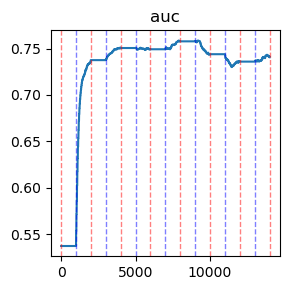



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.740609513988809


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 17:39:37 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

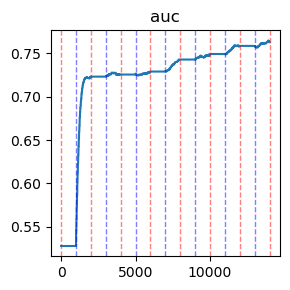



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7628583815614174


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 17:44:04 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

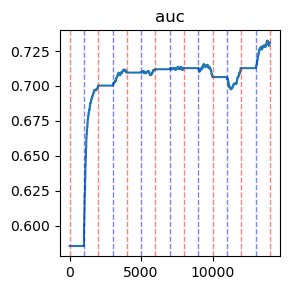



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7311504146016521


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 17:48:33 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

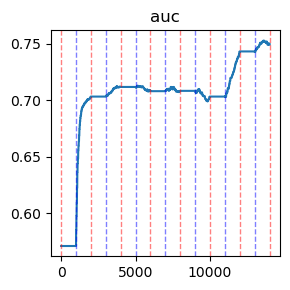



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7495357063682387


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 17:53:02 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

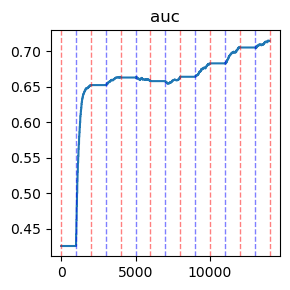



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7150299776179057


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 17:57:30 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

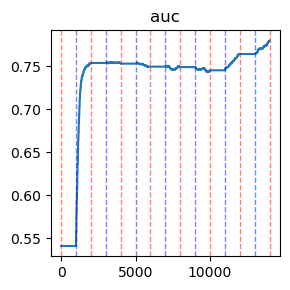



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7797781790567547


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 18:01:58 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

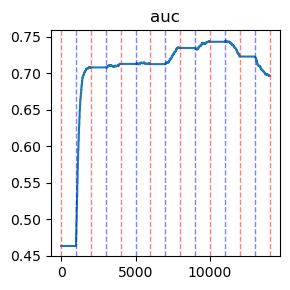



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6965114590993873


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 18:06:27 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

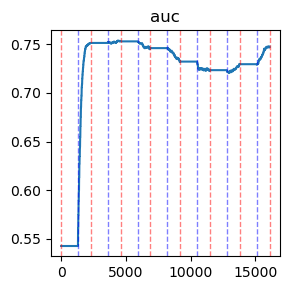



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7476705318411938


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 18:11:30 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

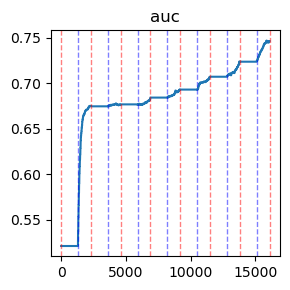



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7460718108180123


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 18:16:31 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

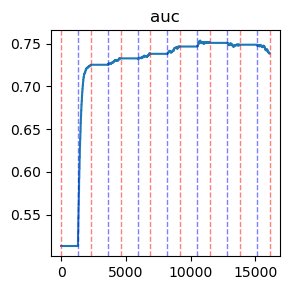



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7386111127098323


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 18:21:34 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

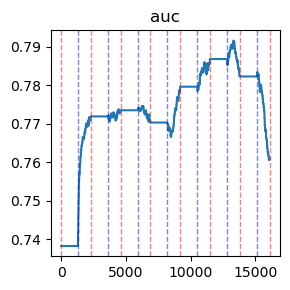



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7609932070343726


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 18:26:38 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

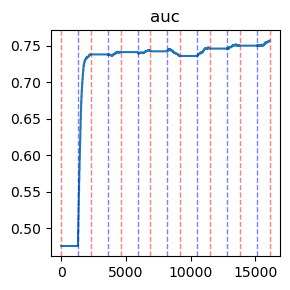



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7567299509725554


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 18:31:41 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

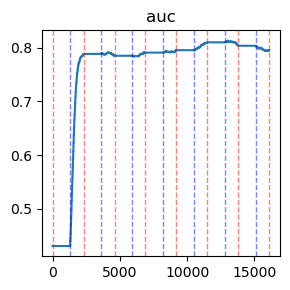



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7950992555289104


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 18:36:45 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

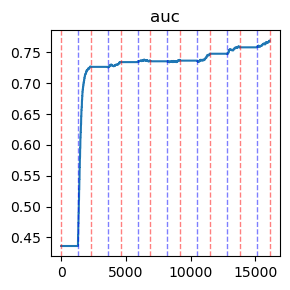



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7692532656541434


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 18:41:46 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

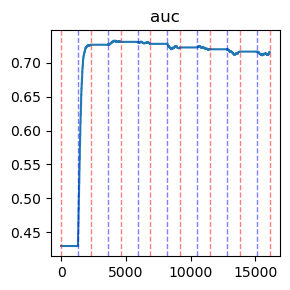



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7163622451372235


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 18:46:51 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

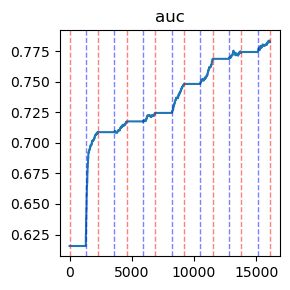



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7823094873434585


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 18:51:54 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1000,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

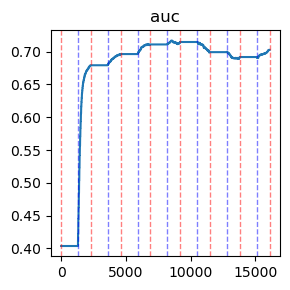



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7026398896882495


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 18:56:56 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1300,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

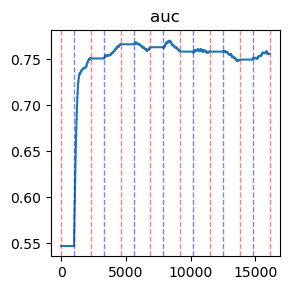



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7556641369571011


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-28 19:02:10 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 1300,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

KeyboardInterrupt: 

In [14]:

# dim_feats = [36, 40, 46, 50, 56, 60, 66, 70, 76, 80]
dim_feats = [24]
l1_regs = [1]
# l1_regs = [0.0, 0.01, 0.1, 1, 10]
# s_regs = [10, 1, 0.1, 0.01, 0.0]
s_regs = [0.0, 0.01]
n_iters_feats = [1300, 1500]
lr_feats = [3e-6]


n_iters_prior = [1000, 1300]
lr_prior = [3e-6]
noise_amps = [0.1]

scheduler_step_sizes = [1000]
n_back_forths = [7]

range_triplets = [
    ['clamiter_init', 'dim_feat', dim_feats],
    ['clamiter_init','s_reg', s_regs],
    ['clamiter_init','l1_reg', l1_regs],
    ['feat_opt','n_iter', n_iters_feats],
    ['feat_opt','lr', lr_feats],

    ['prior_opt','n_iter', n_iters_prior],
    ['prior_opt','lr', lr_prior],
    ['prior_opt','noise_amp', noise_amps],

    ['back_forth', 'scheduler_step_size', scheduler_step_sizes],
    ['back_forth', 'n_back_forth', n_back_forths],
    ['back_forth', 'first_func_in_fit', ['fit_prior']]
]
#todo: how to default without the range triplets? if i just want to make optimization for many iterations on the mighty or the specialized?

#todo: why is the l1 reg not working
# Create the file if it doesn't exist
ds_name = 'texas'
model_name = 'pieclam'
global_config_base = True
densify = False
attr_opt = False #! TRY WITHOUT ATTRIBUTES!!!!
test_p = 0.1
val_p = 0.0

ou.cross_val_link(
    ds_name,
    model_name=model_name,
    range_triplets=range_triplets,
    global_config_base=global_config_base,
    densify=densify,
    attr_opt=attr_opt,
    test_p=test_p,
    val_p=val_p,
    device=device,
    n_reps=10,
    plot_every=-1
    )


#todo: more prior iterations, less noise amp. more power to prior in general!!



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:00:54 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_forth": 6,
        "scheduler_step_size": 1000,
        "scheduler_gamma": 0.5,
        "early_stop_fit": 0,
        "first_func_in_fit": "fit_feats"
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:541:::  
in fit,
first_func_in_fit='fit_feats'
second_function_name='fit_prior'


/home/user/Do

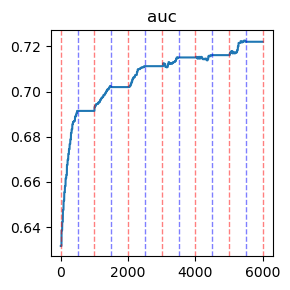



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.721995833504625


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:03:04 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

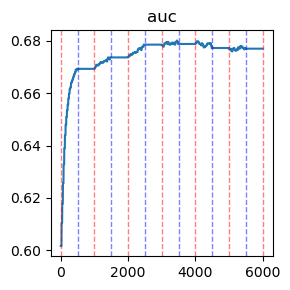



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6770318047276466


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:05:16 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

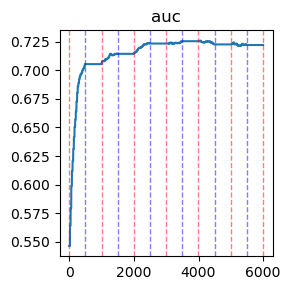



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7219958335046249


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:07:26 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

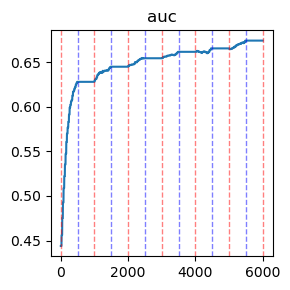



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6742054943473793


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:09:34 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

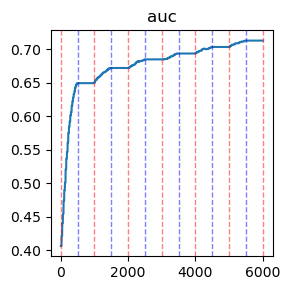



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7127460904419322


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:11:41 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

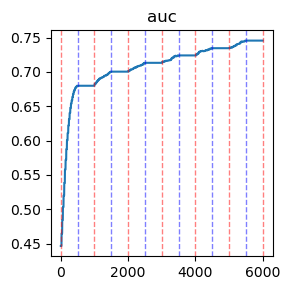



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7456340657759508


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:13:48 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

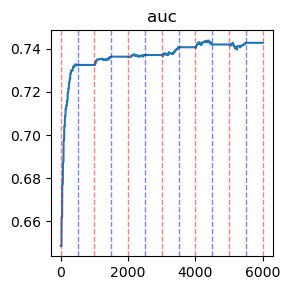



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7428077553956834


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:15:56 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

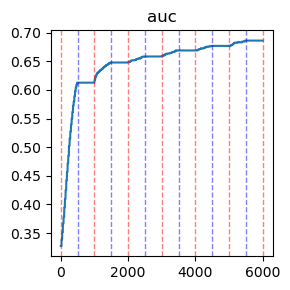



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6862815477903392


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:18:04 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

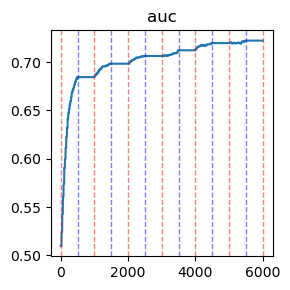



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.722252770811922


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:20:11 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

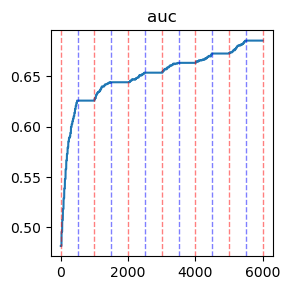



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6855107358684481


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:22:19 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

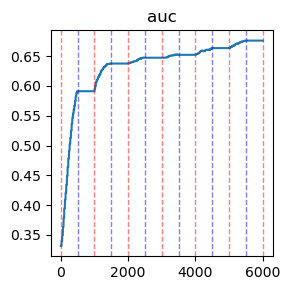



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6762609928057555


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:24:27 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

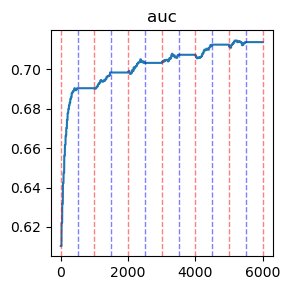



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7137738396711203


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:26:34 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

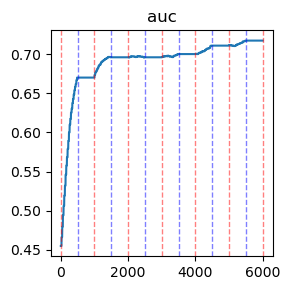



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7173709619732785


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:28:42 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

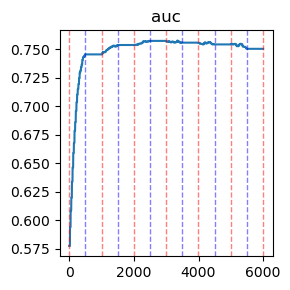



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7502589373072972


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:30:49 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

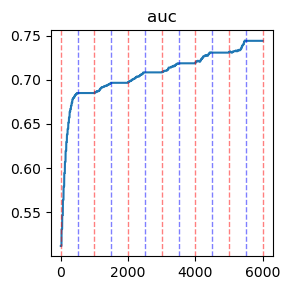



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7440924419321686


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:32:57 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

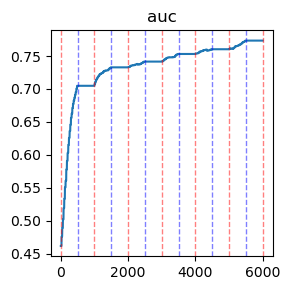



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7733832949640288


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:35:05 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

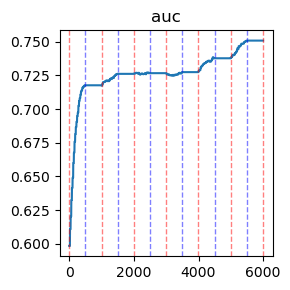



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7507728119218912


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:37:13 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

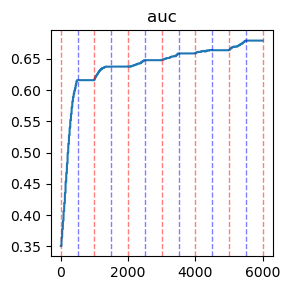



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6793442404933197


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:39:20 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

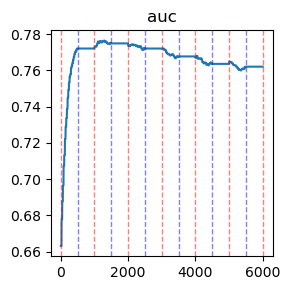



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.76207805344296


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:41:28 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_fo

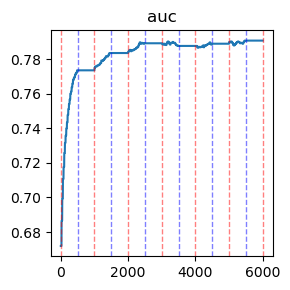



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7908550318602262


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:43:36 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

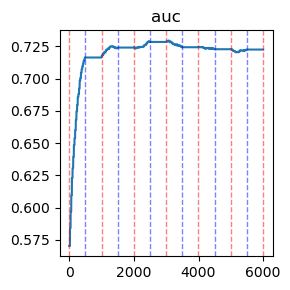



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7225097081192189


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:45:44 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

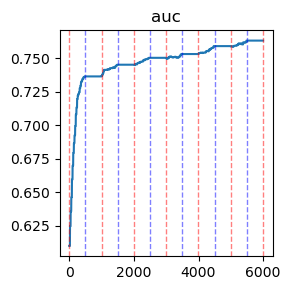



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.763105802672148


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:47:52 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

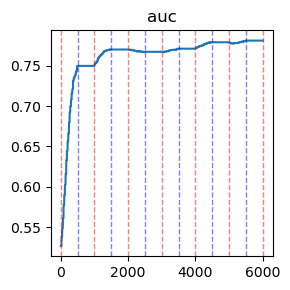



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7810914141829393


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:50:00 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

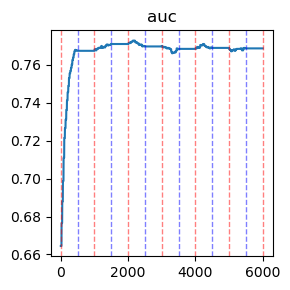



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7687584234326824


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:52:09 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

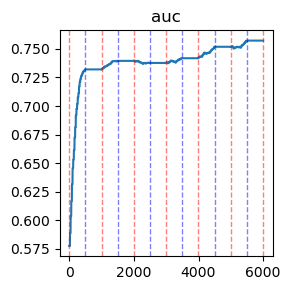



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7571962446043166


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:54:17 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

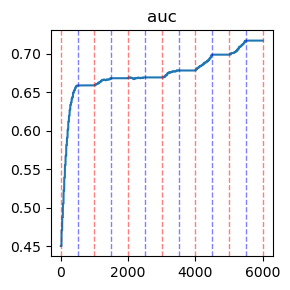



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7168570873586845


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:56:26 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

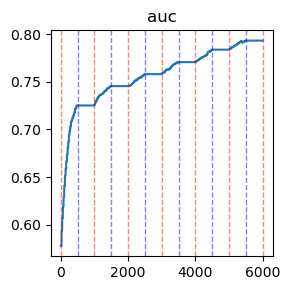



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7931674676258993


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 13:58:35 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

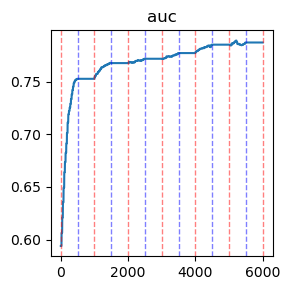



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7870009722507708


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:00:44 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

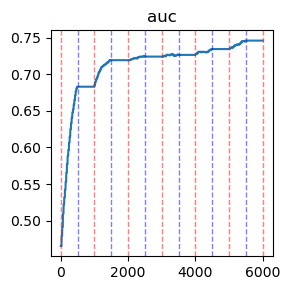



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7458910030832477


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:02:52 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

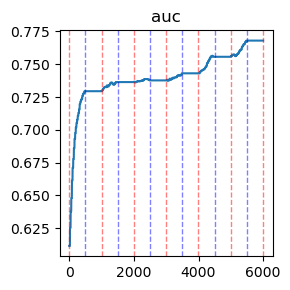



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7679876115107913


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:05:00 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

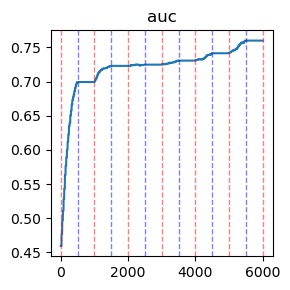



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7600225549845838


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:07:09 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

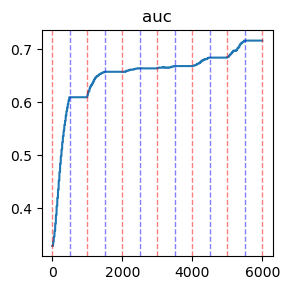



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7163432127440904


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:09:17 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

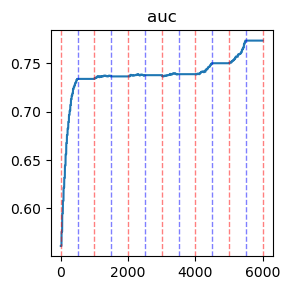



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7733832949640288


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:11:25 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

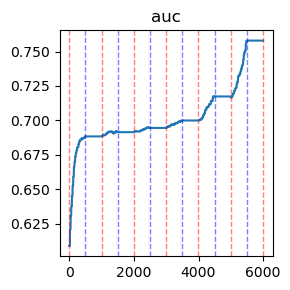



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7579670565262077


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:13:34 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

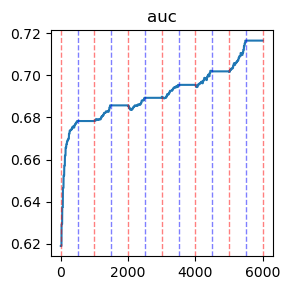



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7166001500513876


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:15:42 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

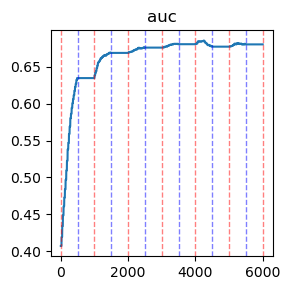



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6806289270298047


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:17:49 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

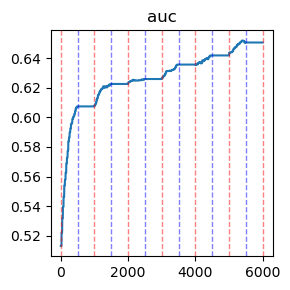



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6505672620760534


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:19:58 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

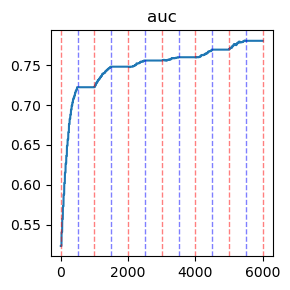



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7803206022610484


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:22:05 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

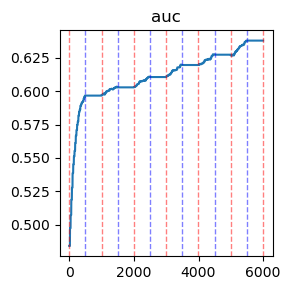



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6377203967112025


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:24:14 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

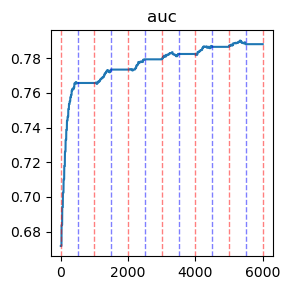



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7880287214799591


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:26:22 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

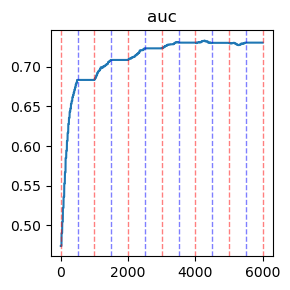



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7304747646454265


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:28:31 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

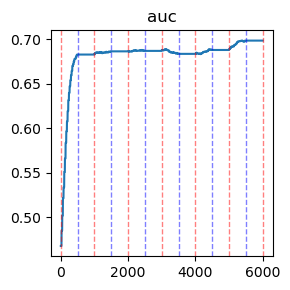



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.698357601233299


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:30:40 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

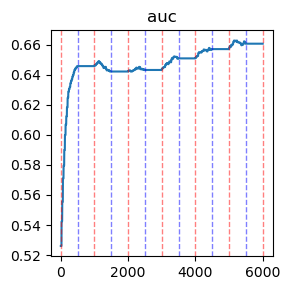



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6605878170606373


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:32:50 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

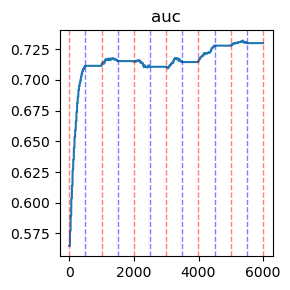



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7299608900308325


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:34:59 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

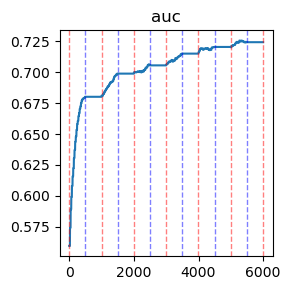



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7243082692702981


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:37:06 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

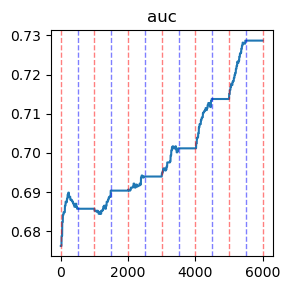



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7286762034943474


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:39:12 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

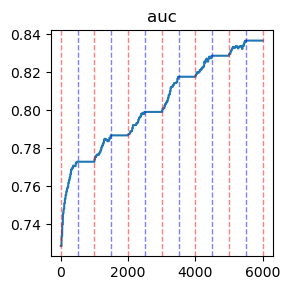



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8365898725590957


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:41:18 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

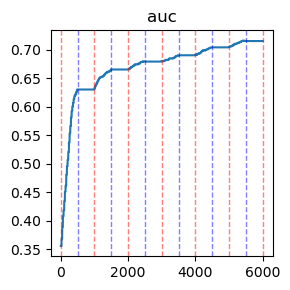



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7150585262076053


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:43:26 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

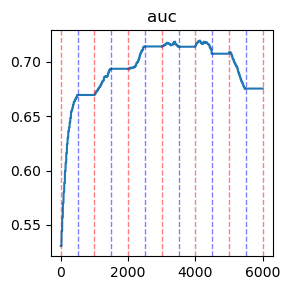



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6754901808838644


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:45:37 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

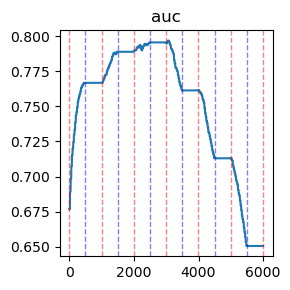



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6505672620760535


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:47:48 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

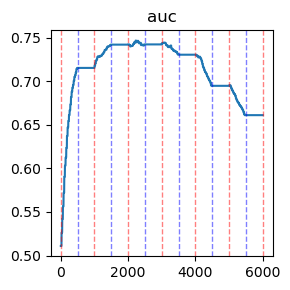



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6611016916752313


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:49:58 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

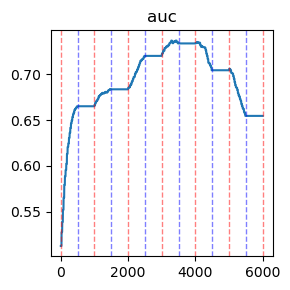



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6546782589928057


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:52:09 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

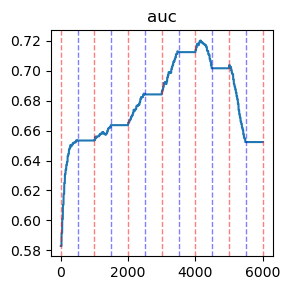



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6523658232271327


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:54:20 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

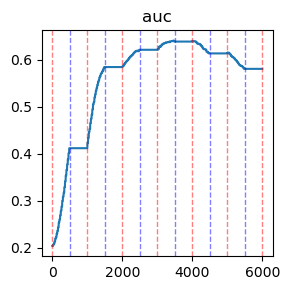



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5801664398766702


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:56:33 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

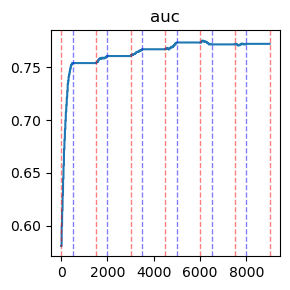



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7723555457348408


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 14:59:42 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

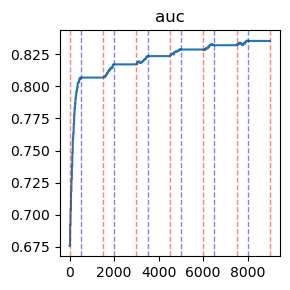



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8353051860226106


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:02:47 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

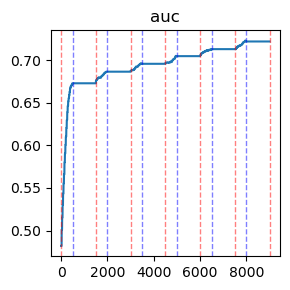



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7219958335046248


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:05:50 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

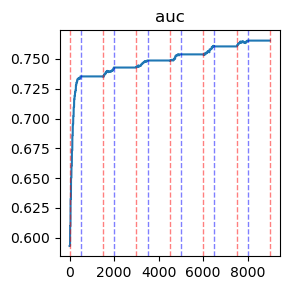



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7654182384378213


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:08:49 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

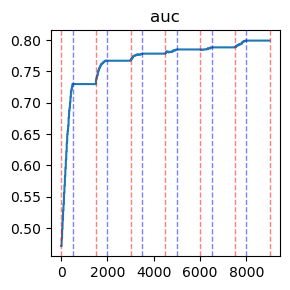



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7990770256937307


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:11:49 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

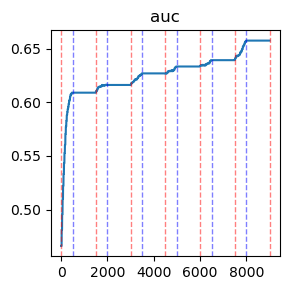



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6575045693730731


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:14:51 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

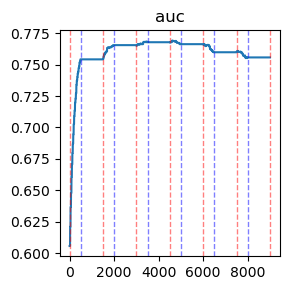



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7556546207605345


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:17:59 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

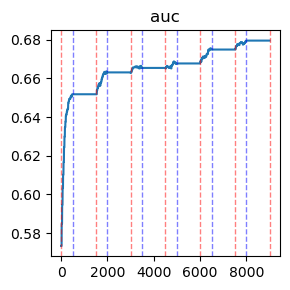



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6796011778006167


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:21:09 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

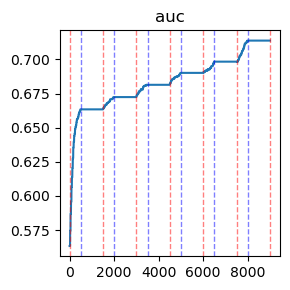



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7137738396711204


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:24:14 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

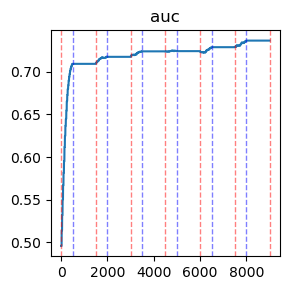



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.736384322713258


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:27:19 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

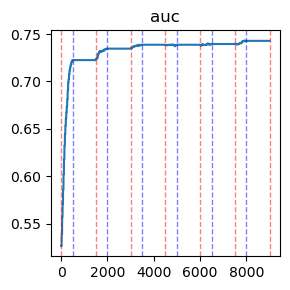



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7428077553956836


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:30:25 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

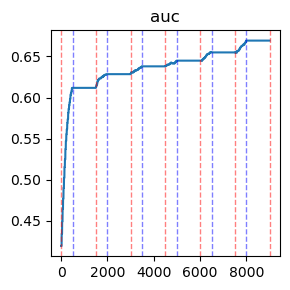



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6693236855087359


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:33:29 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

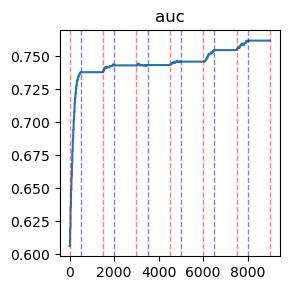



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7618211161356628


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:37:41 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

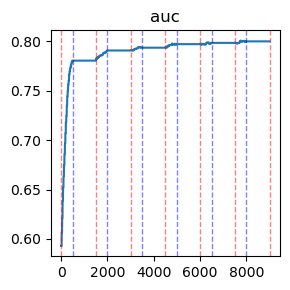



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8001047749229189


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:42:16 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

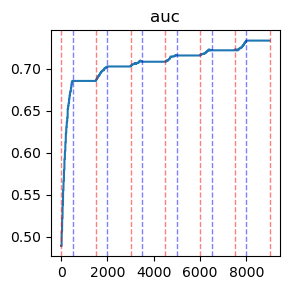



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7338149496402878


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:45:24 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

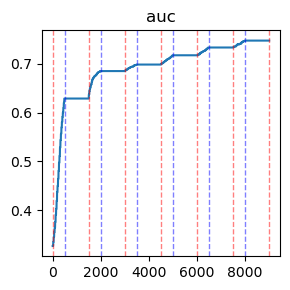



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7474326269270298


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:49:31 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

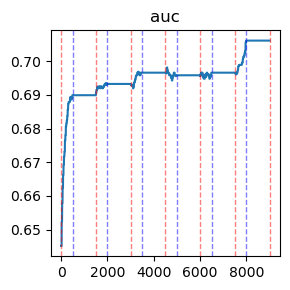



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7060657204522097


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:54:14 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

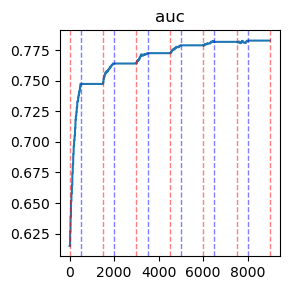



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7828899753340184


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 15:59:29 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

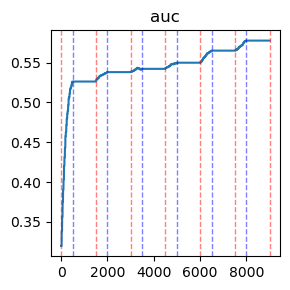



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5775970668036999


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 16:04:50 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

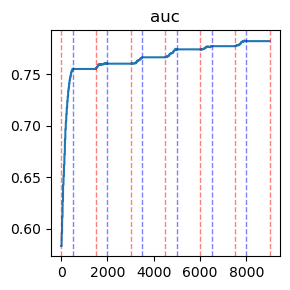



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7818622261048305


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 16:10:22 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

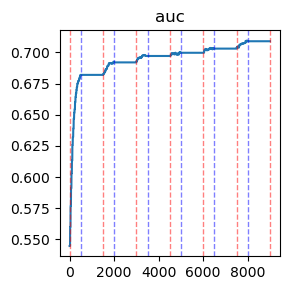



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7088920308324769


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 16:16:02 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

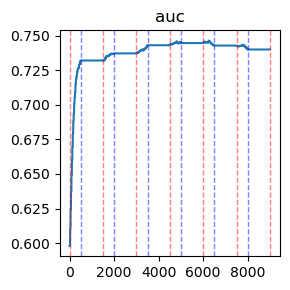



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7399814450154163


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 16:21:10 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

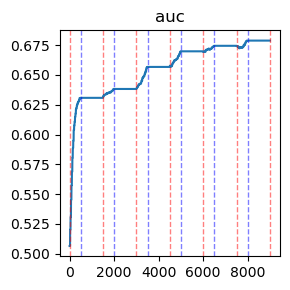



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6788303658787257


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 16:26:18 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

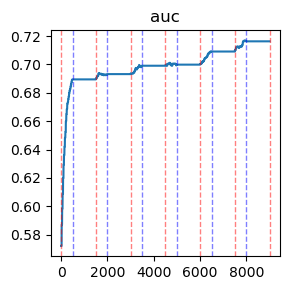



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7163432127440905


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 16:31:29 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

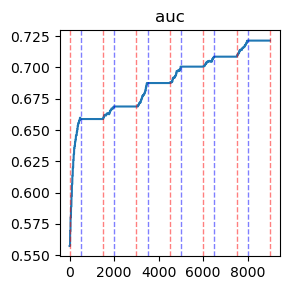



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7214819588900309


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 16:36:40 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

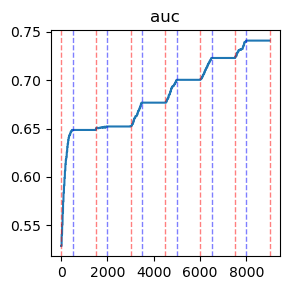



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7410091942446044


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 16:42:00 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

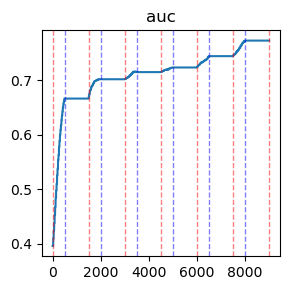



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7728694203494347


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 16:47:16 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

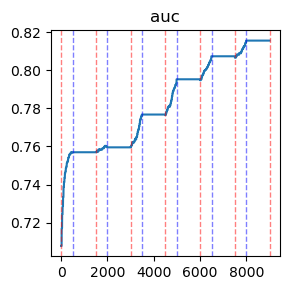



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.81552101336074


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 16:51:00 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

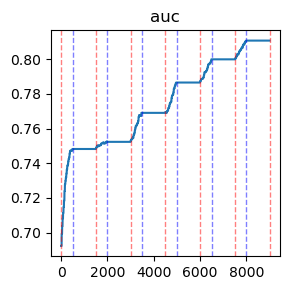



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8106392045220966


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 16:53:55 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

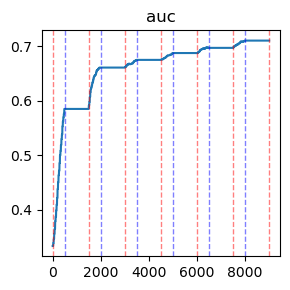



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.710690591983556


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 16:56:51 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

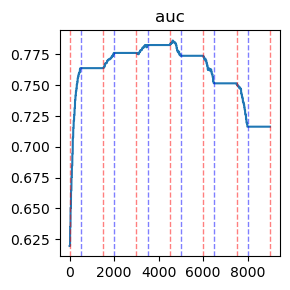



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7163432127440905


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 16:59:47 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

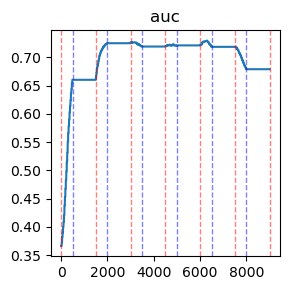



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6790873031860226


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:02:44 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

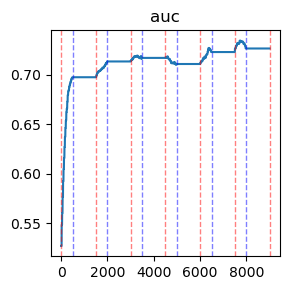



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7266207050359713


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:05:40 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

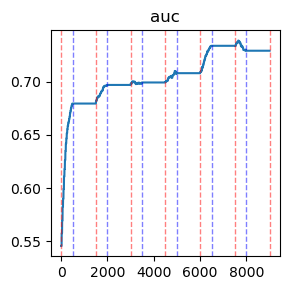



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7289331408016444


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:08:34 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

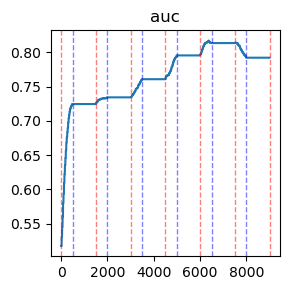



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7921397183967113


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:11:30 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

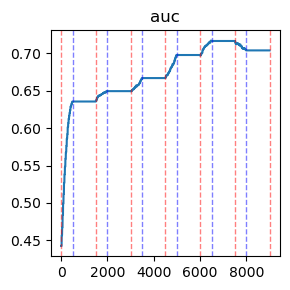



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7040102219938336


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:14:25 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

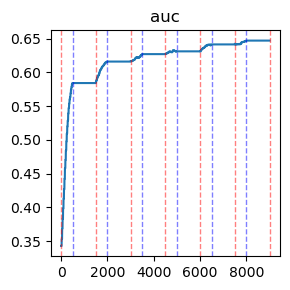



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6472270770811922


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:17:21 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

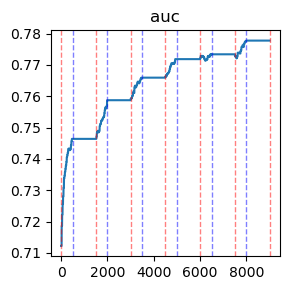



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7777512291880782


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:20:17 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

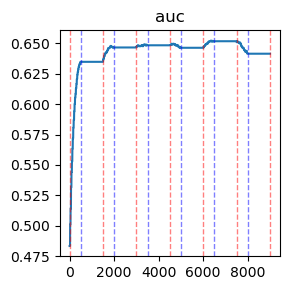



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6415744563206578


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:23:12 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

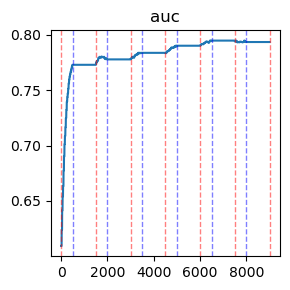



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7934244049331963


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:26:08 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

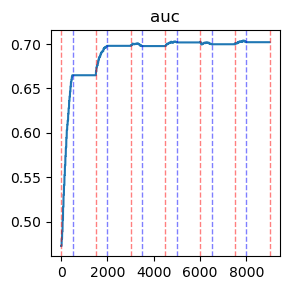



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7022116608427544


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:29:03 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

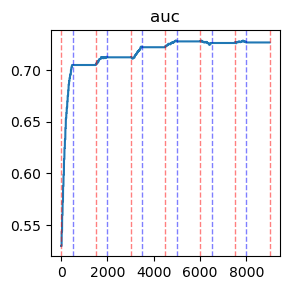



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7268776423432682


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:31:58 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

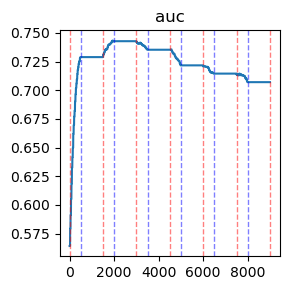



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7070934696813979


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:34:54 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

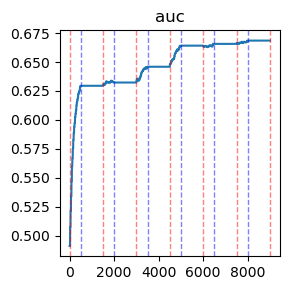



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.668552873586845


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:37:49 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

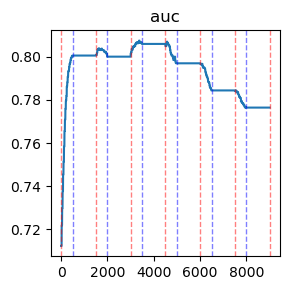



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7764665426515931


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:40:44 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

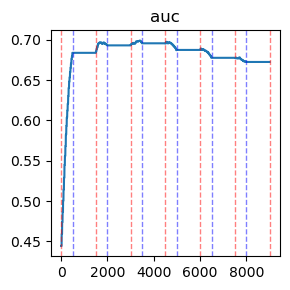



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6724069331963002


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:43:40 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

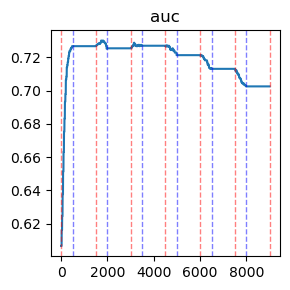



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7024685981500515


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:46:35 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

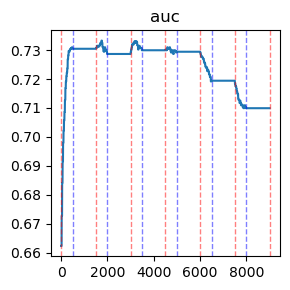



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.709919780061665


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:49:30 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

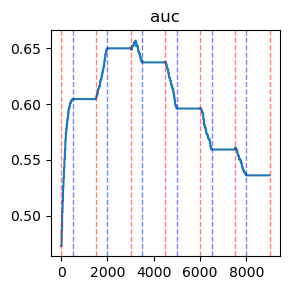



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5362301603288798


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:52:25 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

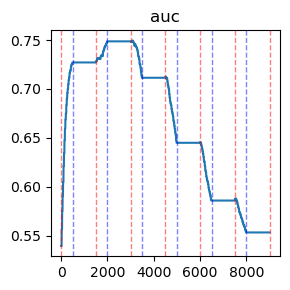



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.553188022610483


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:55:21 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

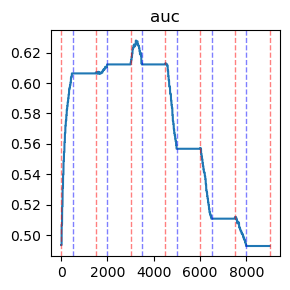



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.49280775539568344


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 17:58:16 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_ba

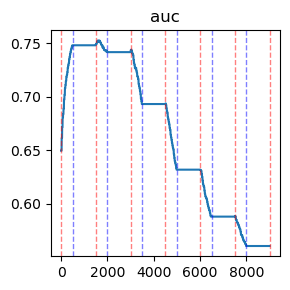



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5603822672147997


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 18:01:12 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

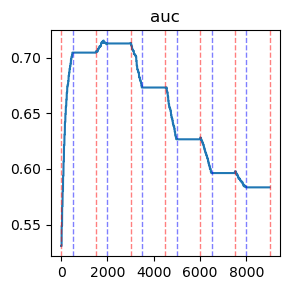



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5835066248715315


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 18:04:08 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

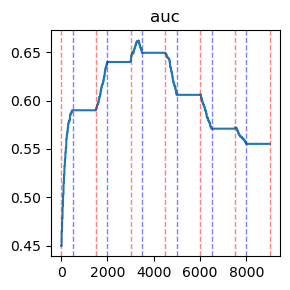



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5552435210688593


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 18:07:56 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

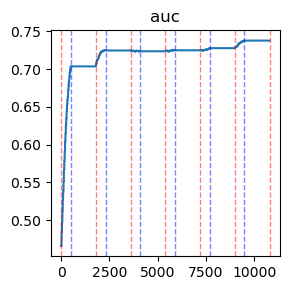



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7379259465570401


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 18:13:20 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

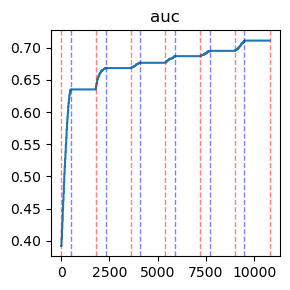



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.710947529290853


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 18:19:29 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

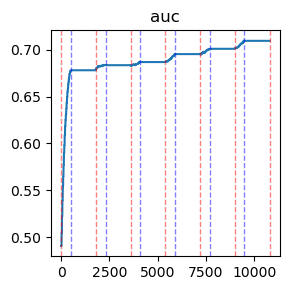



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7094059054470709


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 18:25:45 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

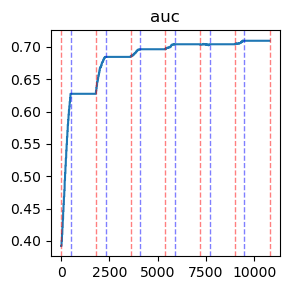



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7094059054470709


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 18:32:19 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

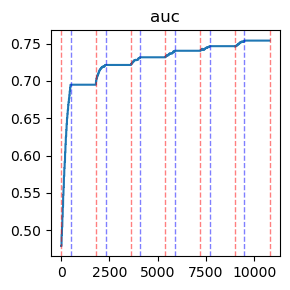



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7541129969167524


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 18:39:01 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

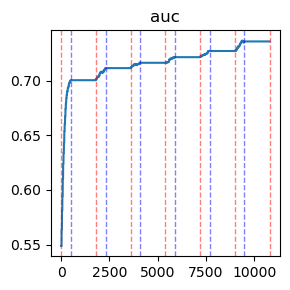



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.735870448098664


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 18:45:49 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

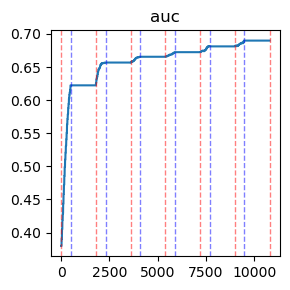



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6898786700924976


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 18:52:43 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

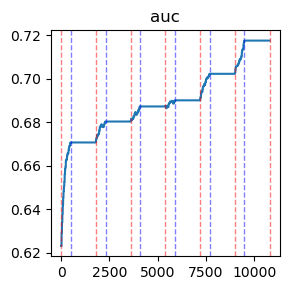



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7176278992805757


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 18:59:36 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

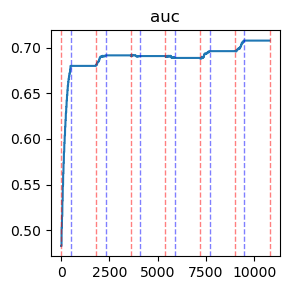



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7078642816032888


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:06:39 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

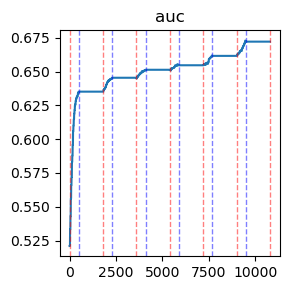



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6721499958890031


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:10:57 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

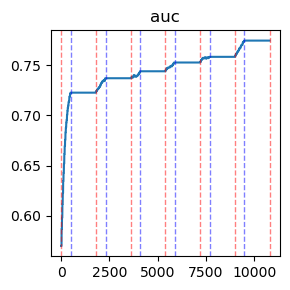



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7746679815005139


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:14:38 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

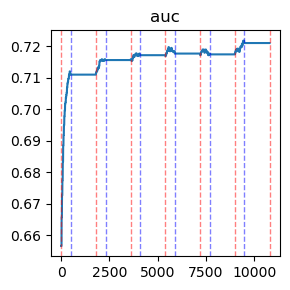



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7209680842754368


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:18:18 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

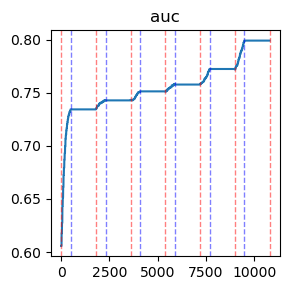



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7990770256937307


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:21:58 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

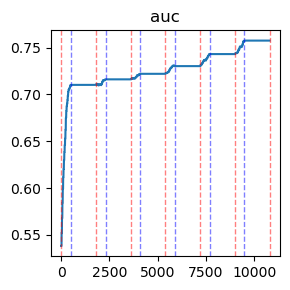



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7574531819116137


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:25:39 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

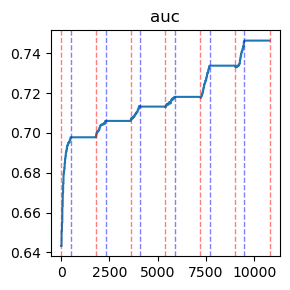



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7464048776978418


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:29:20 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

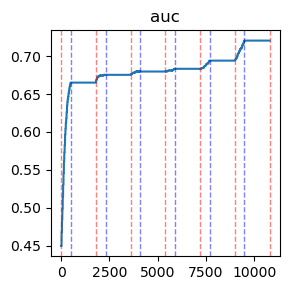



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7207111469681399


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:32:59 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

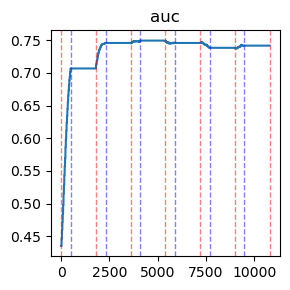



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7417800061664954


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:36:40 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

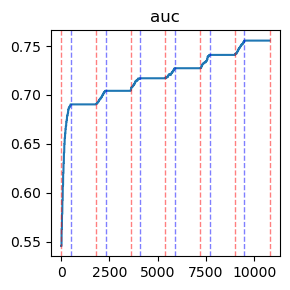



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7556546207605345


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:40:19 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

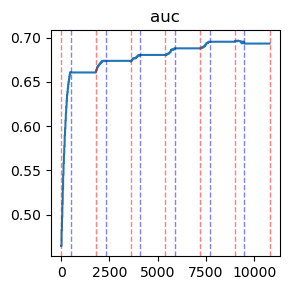



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6932188550873587


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:44:00 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

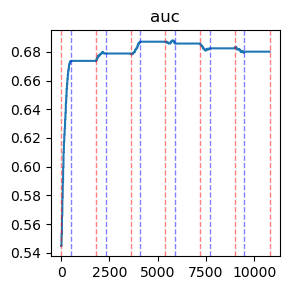



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6801150524152108


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:47:40 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

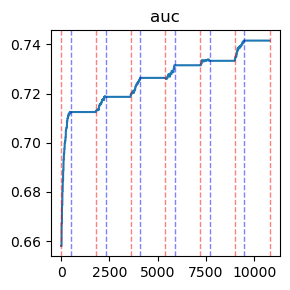



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7415230688591985


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:51:20 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

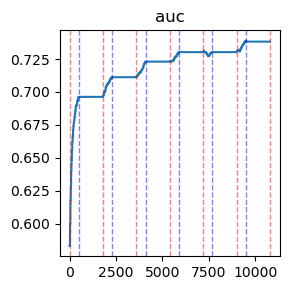



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7381828838643372


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:55:00 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

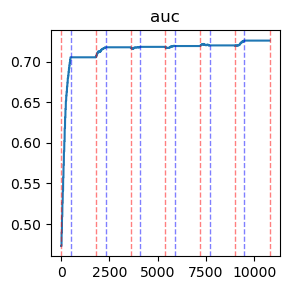



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7258498931140801


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 19:58:40 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

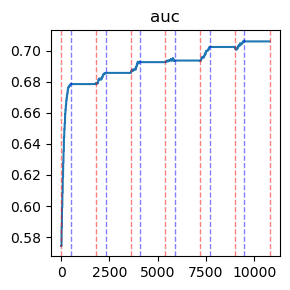



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7060657204522096


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:02:20 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

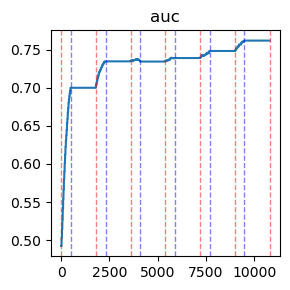



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.761821116135663


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:06:00 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

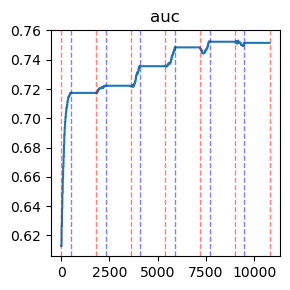



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7515436238437821


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:09:39 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

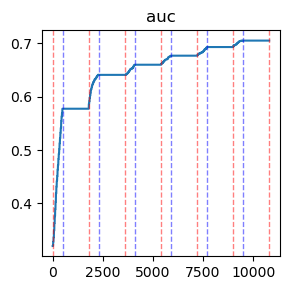



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7052949085303187


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:13:19 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

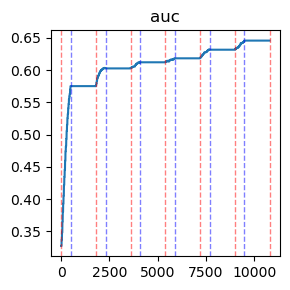



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6459423905447071


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:16:59 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

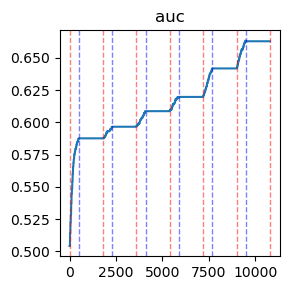



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6629002528263105


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:20:39 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

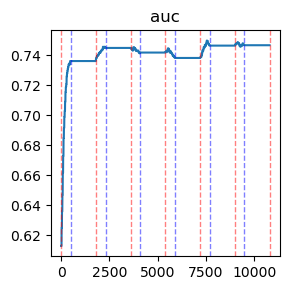



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7466618150051388


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:24:19 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

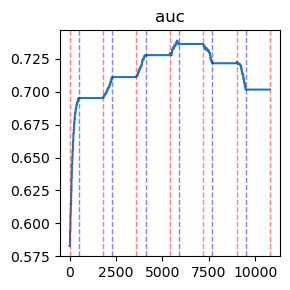



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7016977862281605


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:27:58 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

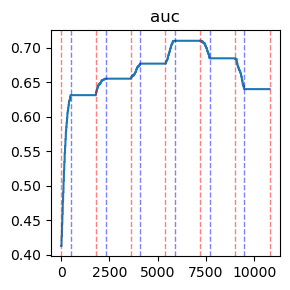



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6402897697841727


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:31:38 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

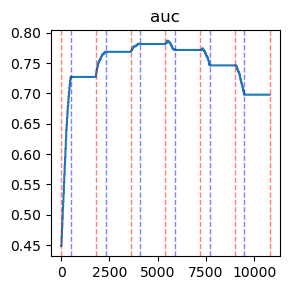



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6978437266187051


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:35:18 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

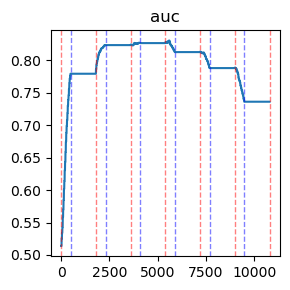



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.736384322713258


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:38:58 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

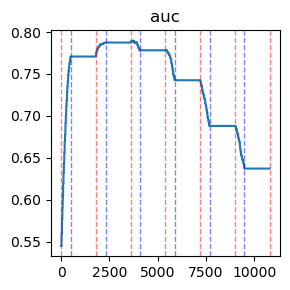



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6372065220966084


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:42:39 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

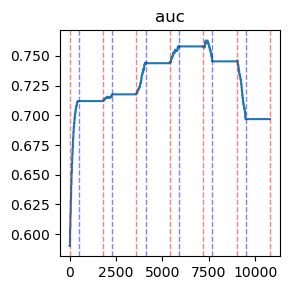



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6968159773895171


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:46:19 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

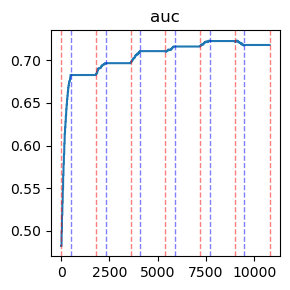



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7178848365878726


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:50:00 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

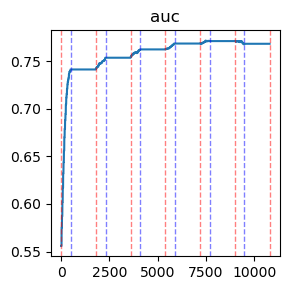



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7682445488180885


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:53:39 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

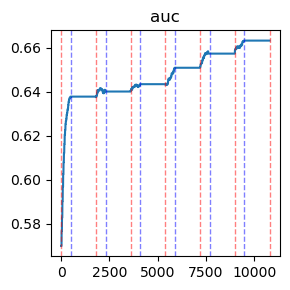



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6631571901336073


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 20:57:19 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

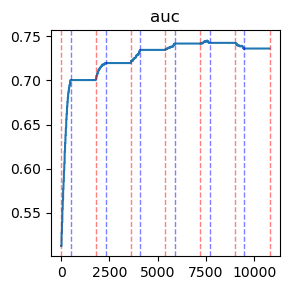



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.736127385405961


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:00:57 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

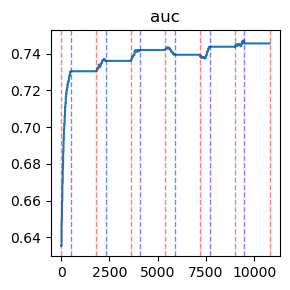



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7456340657759507


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:04:37 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

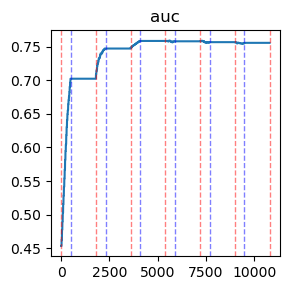



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7559115580678315


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:08:15 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

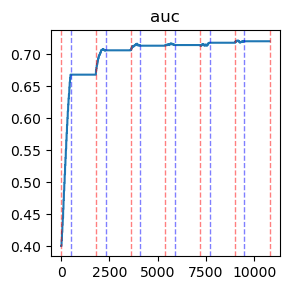



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7199403350462488


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:11:55 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

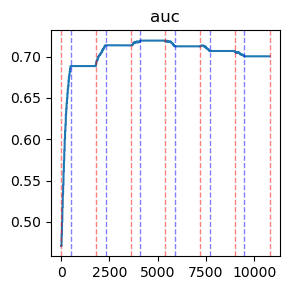



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7004130996916752


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:15:34 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

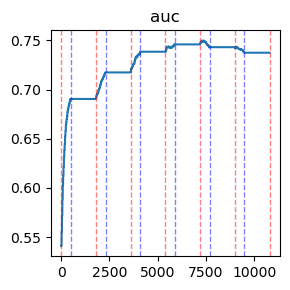



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7374120719424461


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:19:13 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

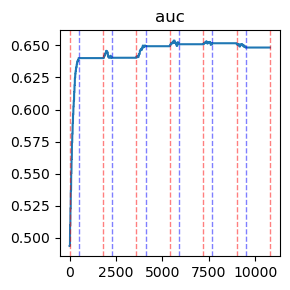



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6482548263103803


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:22:52 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

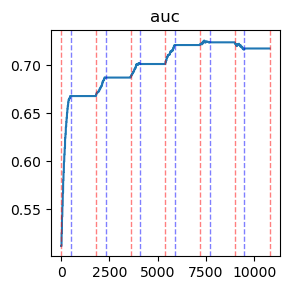



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7176278992805756


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:26:31 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

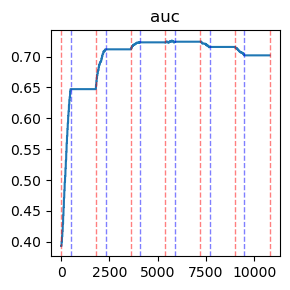



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7019547235354574


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:30:09 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

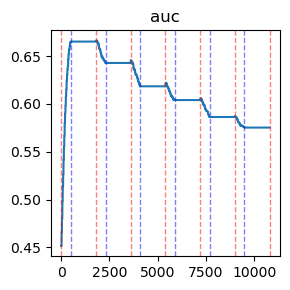



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5752846310380267


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:33:49 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

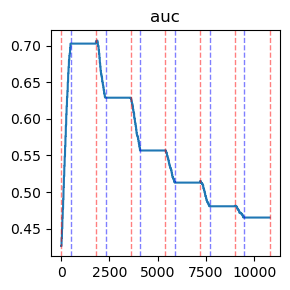



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.4650585262076053


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:37:29 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

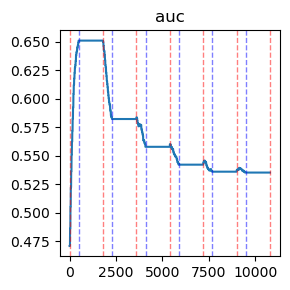



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5352024110996918


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:41:09 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

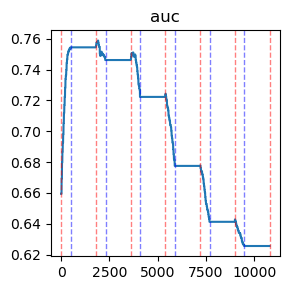



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6256443432682426


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:44:48 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

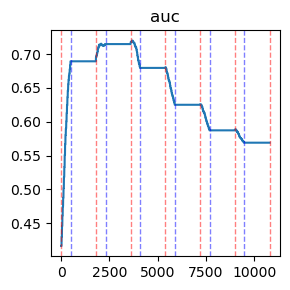



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5691181356628983


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:48:27 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

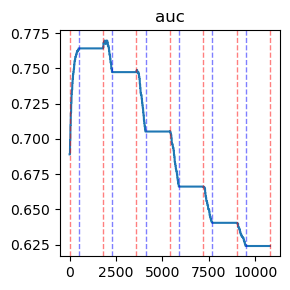



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6241027194244605


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:52:06 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

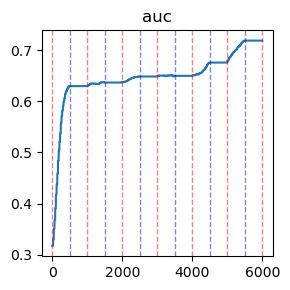



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7183987112024667


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:54:16 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

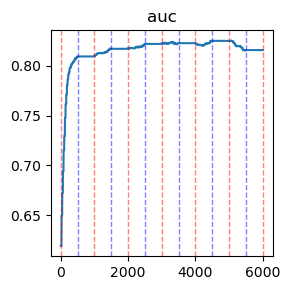



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8157779506680372


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:56:26 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

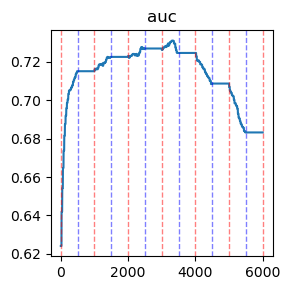



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6831983001027749


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 21:58:36 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

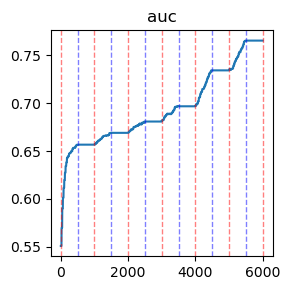



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7654182384378212


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:00:46 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

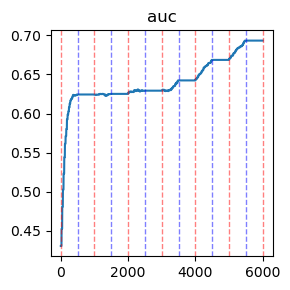



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6932188550873587


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:02:56 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

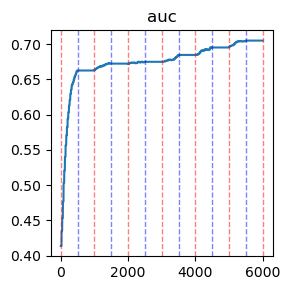



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7050379712230217


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:05:07 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

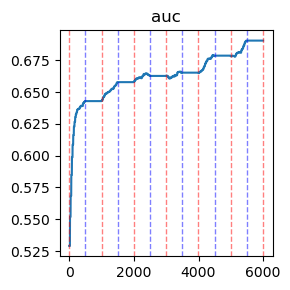



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6903925447070915


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:07:16 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

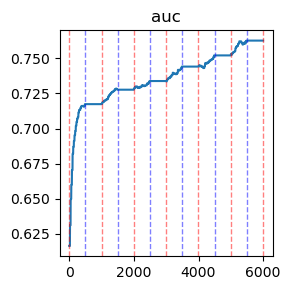



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.762591928057554


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:09:26 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

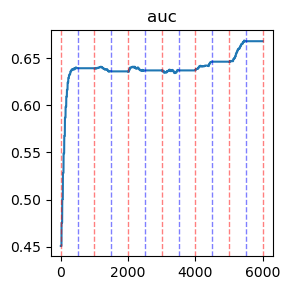



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6679105303186023


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:11:36 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

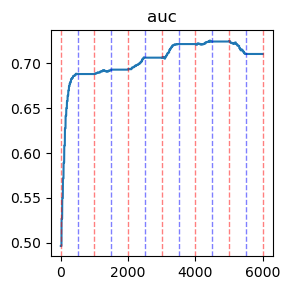



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7104336546762591


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:13:47 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

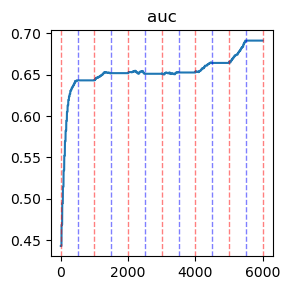



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6911633566289828


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:15:58 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

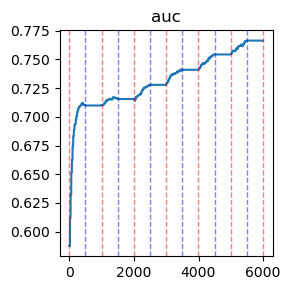



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7664459876670093


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:18:09 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

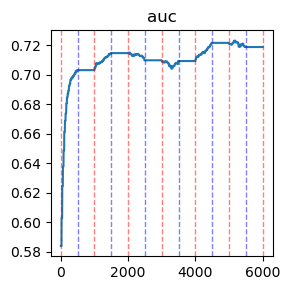



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7189125858170606


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:20:18 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

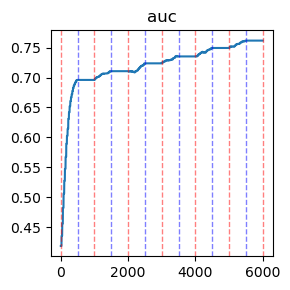



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.761821116135663


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:22:28 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

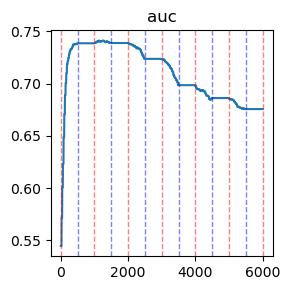



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6757471181911614


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:24:38 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

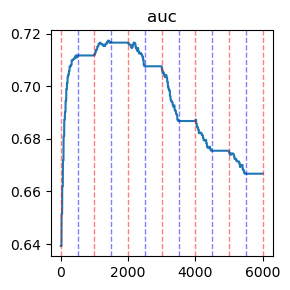



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6667543124357658


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:26:47 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

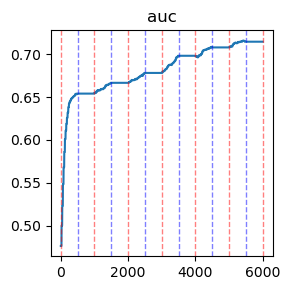



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7148015889003083


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:28:56 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

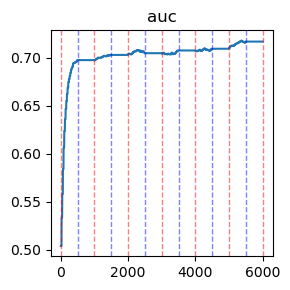



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7166001500513874


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:31:07 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

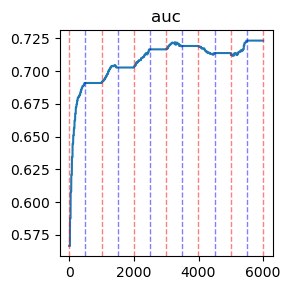



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7232805200411101


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:33:17 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

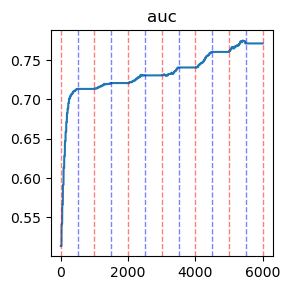



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7710708591983556


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:35:27 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

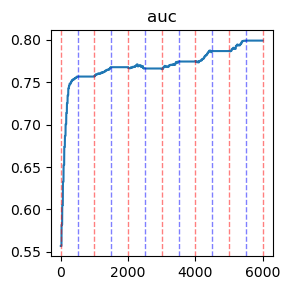



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7990770256937308


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:37:37 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

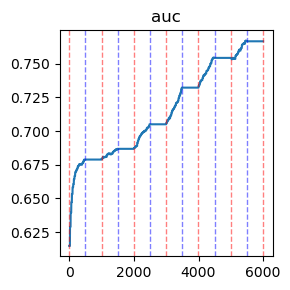



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7667029249743064


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:39:46 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

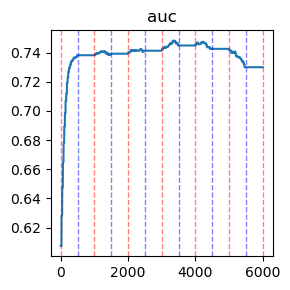



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7299608900308324


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:41:56 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

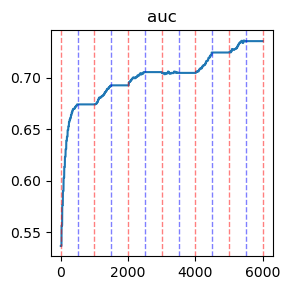



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7353565734840699


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:44:07 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

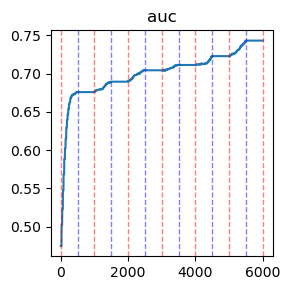



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7430646927029805


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:46:17 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

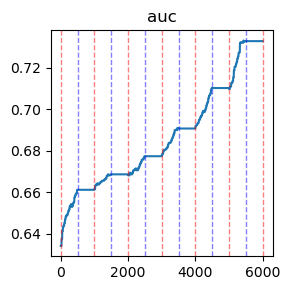



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7327872004110997


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:48:27 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

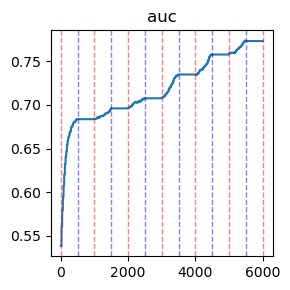



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7731263576567319


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:50:37 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

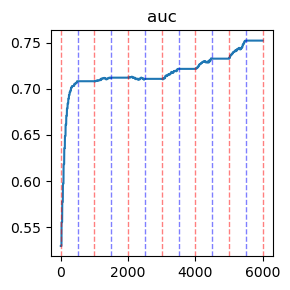



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7520574984583762


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:52:47 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

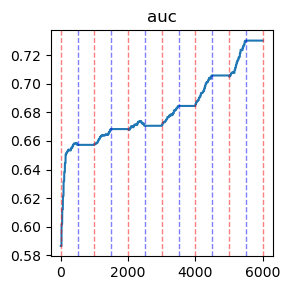



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7302178273381296


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:54:58 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

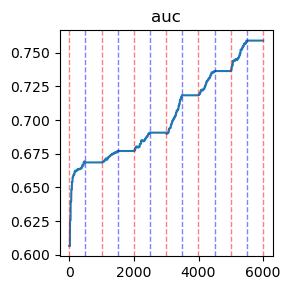



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7589948057553956


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:57:08 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

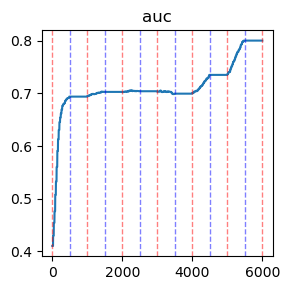



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8006186495375128


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 22:59:18 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

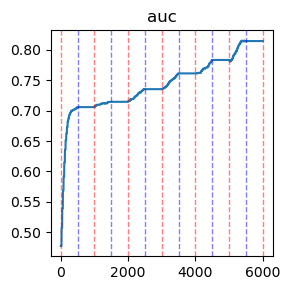



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.814493264131552


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:01:29 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

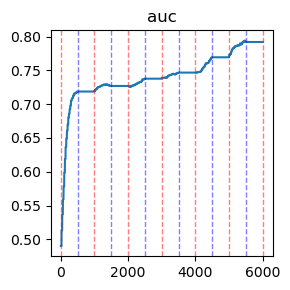



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7918827810894141


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:03:39 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

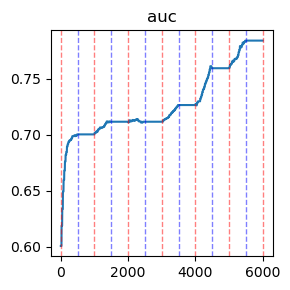



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7839177245632066


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:05:49 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

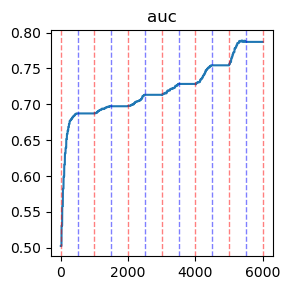



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7870009722507708


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:08:00 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

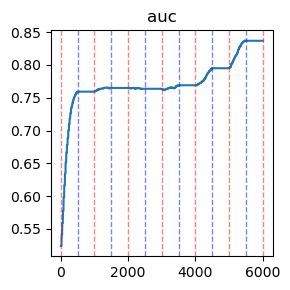



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8368468098663927


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:10:11 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

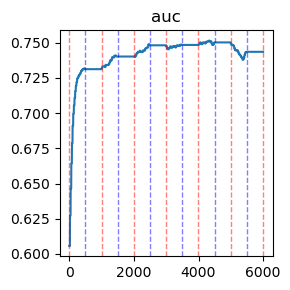



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7435785673175745


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:12:21 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

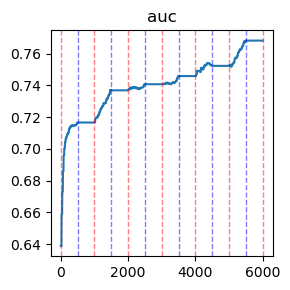



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7682445488180886


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:14:32 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

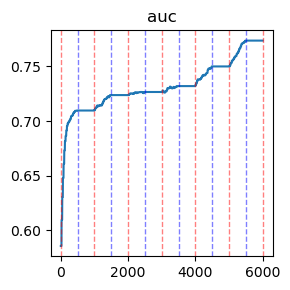



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.773640232271326


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:16:42 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_f

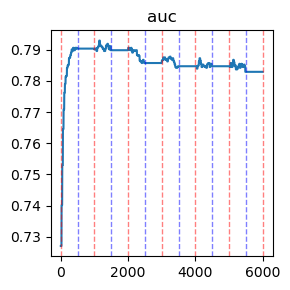



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7828899753340185


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:18:51 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

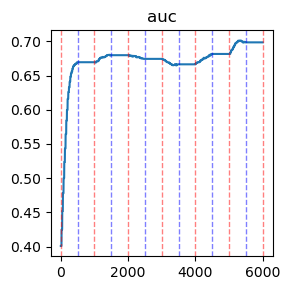



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6986145385405963


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:21:01 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

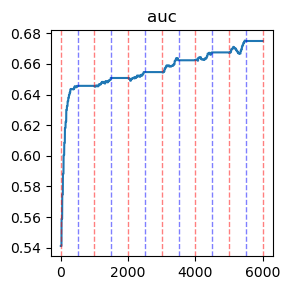



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6749763062692703


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:23:10 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

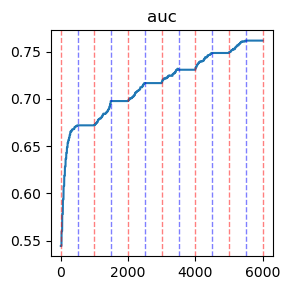



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7615641788283658


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:25:19 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

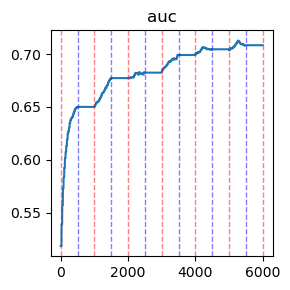



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7083781562178829


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:27:27 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

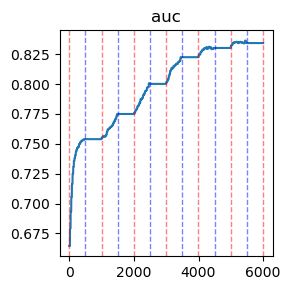



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8342774367934225


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:29:37 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

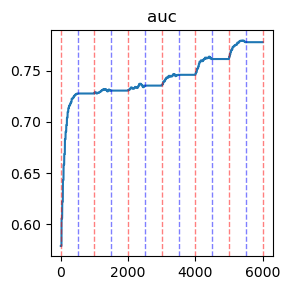



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7777512291880782


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:31:45 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

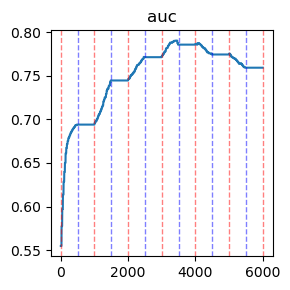



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7592517430626927


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:33:54 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

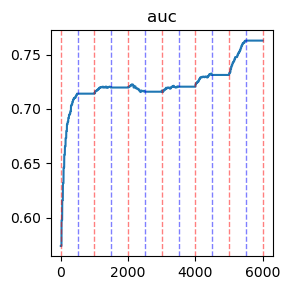



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.762848865364851


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:36:03 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

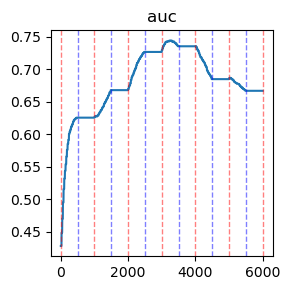



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6667543124357657


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:38:12 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

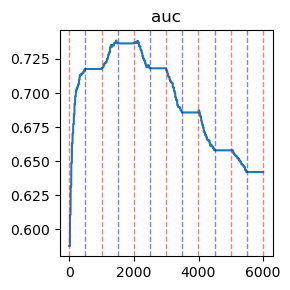



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6420883309352517


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:40:21 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

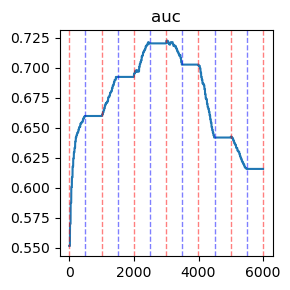



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6156237882836588


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:42:30 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

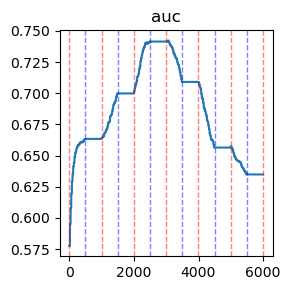



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6348940863309352


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:44:39 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

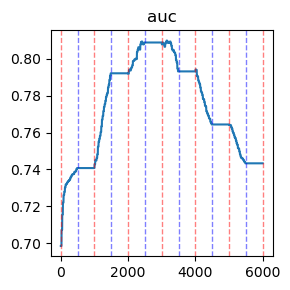



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7433216300102776


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:46:48 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 500,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

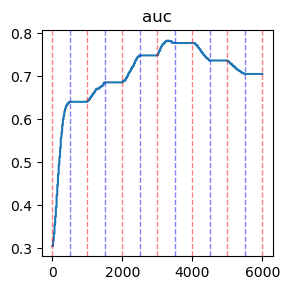



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7050379712230215


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:48:57 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

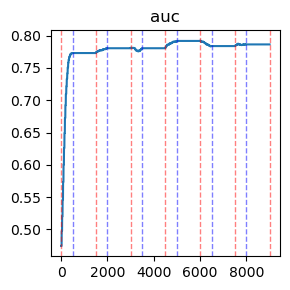



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7864870976361767


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:52:01 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

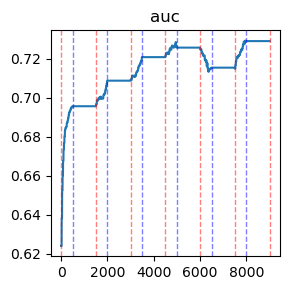



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7289331408016444


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:55:05 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

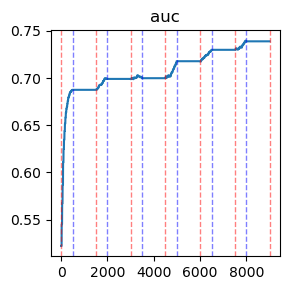



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7389536957862282


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-26 23:58:09 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

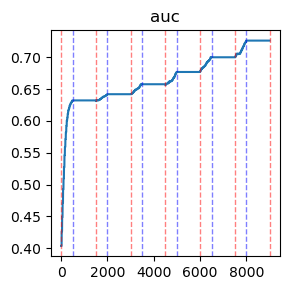



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7263637677286743


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:01:14 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

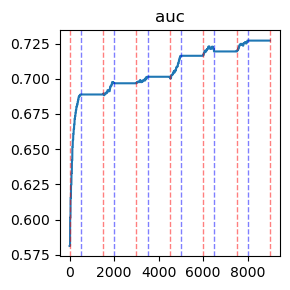



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7271345796505653


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:04:18 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

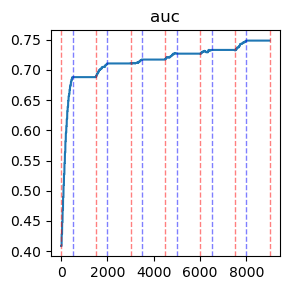



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7482034388489209


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:07:23 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

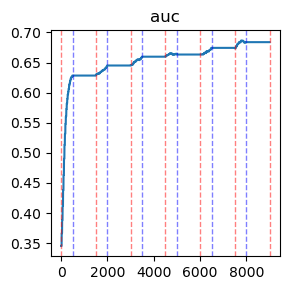



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.683969112024666


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:10:29 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

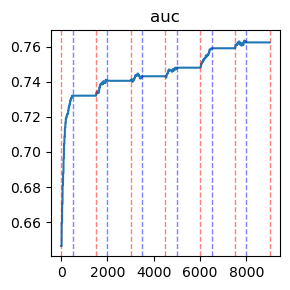



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.762334990750257


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:13:33 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

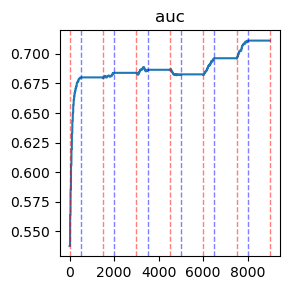



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7112044665981501


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:16:38 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

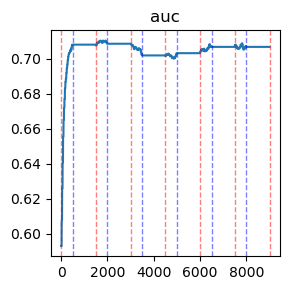



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7068365323741007


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:19:43 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

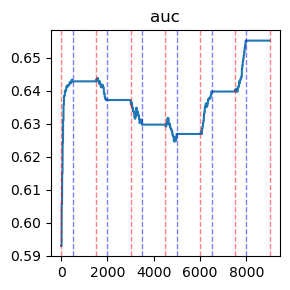



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6551921336073999


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:22:48 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

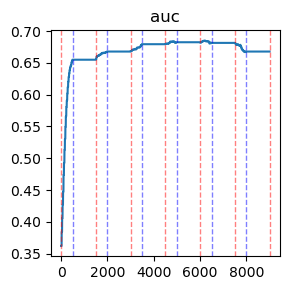



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6677820616649538


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:25:53 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

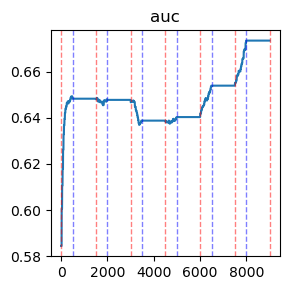



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6734346824254881


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:28:59 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

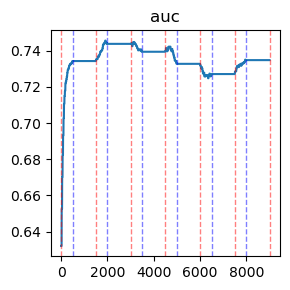



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7348426988694758


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:32:03 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

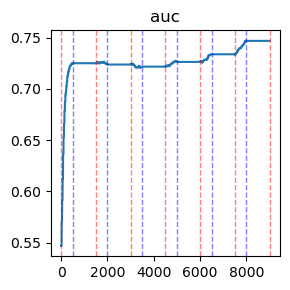



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7469187523124359


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:35:08 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

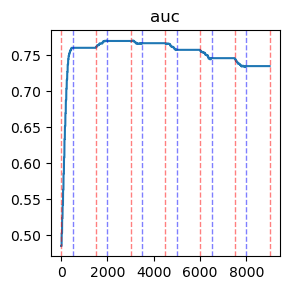



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.735099636176773


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:38:12 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

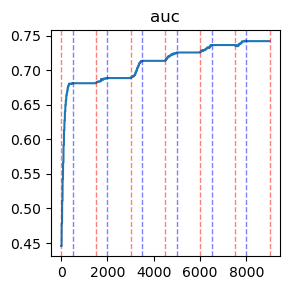



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7420369434737925


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:41:16 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

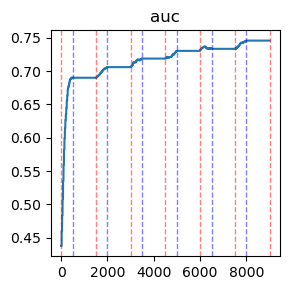



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7458910030832477


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:44:20 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

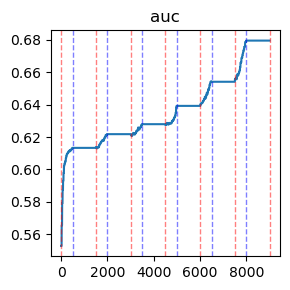



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6796011778006167


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:47:25 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

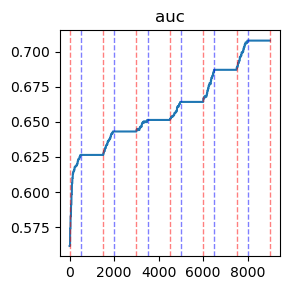



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7078642816032888


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:50:28 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

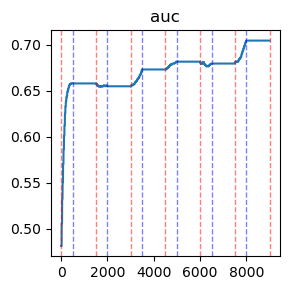



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7042671593011305


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:53:32 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

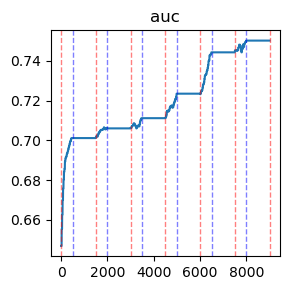



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7502589373072971


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:56:36 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

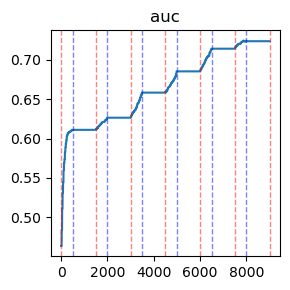



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.723537457348407


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 00:59:40 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_

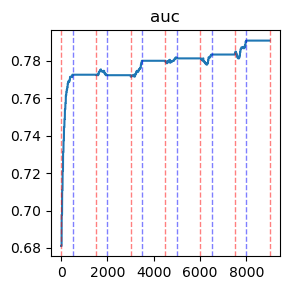



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7908550318602261


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:02:44 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

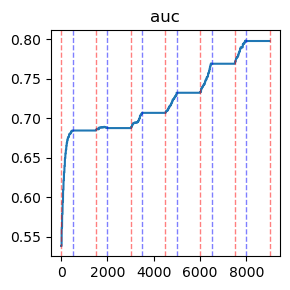



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7977923391572457


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:05:49 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

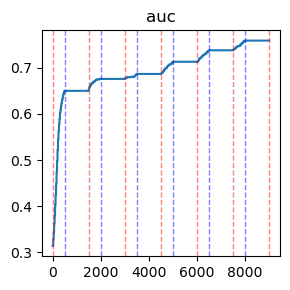



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7595086803699899


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:08:53 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

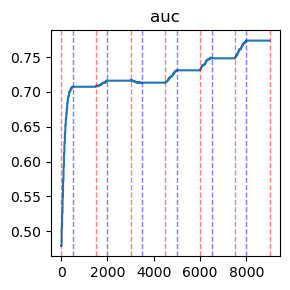



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7736402322713258


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:11:58 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

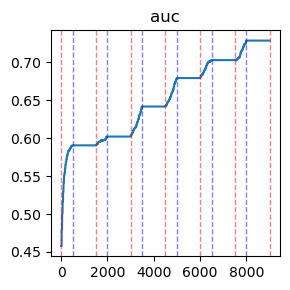



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7284192661870504


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:15:02 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

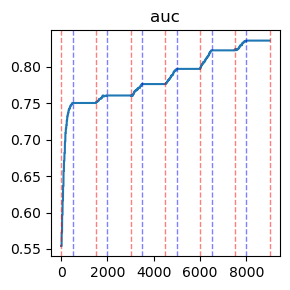



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.8358190606372046


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:18:07 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

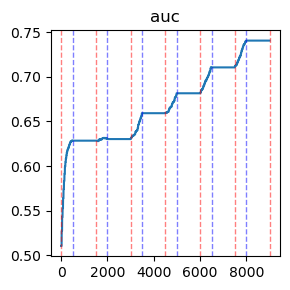



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7407522569373074


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:21:11 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

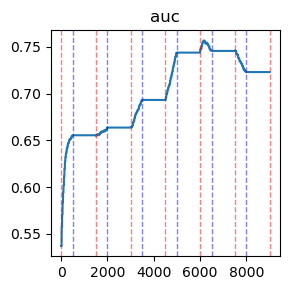



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.723023582733813


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:24:15 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

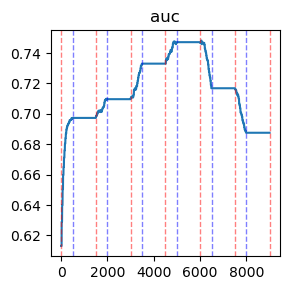



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6875662343268243


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:27:19 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

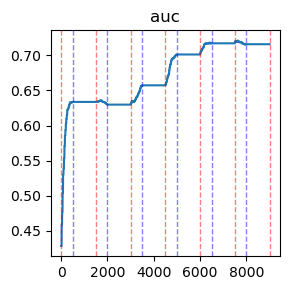



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7158293381294963


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:30:25 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

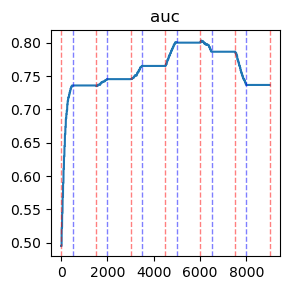



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.736641260020555


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:33:29 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

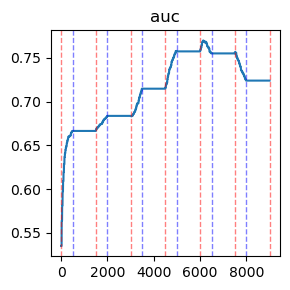



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7240513319630011


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:36:33 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 3e-06,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

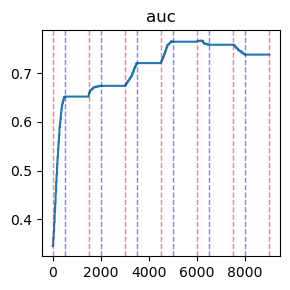



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7384398211716342


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:39:39 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

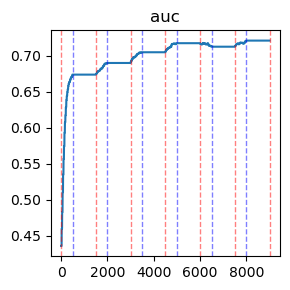



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7209680842754369


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:42:43 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

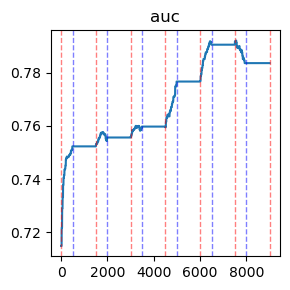



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7836607872559095


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:45:48 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

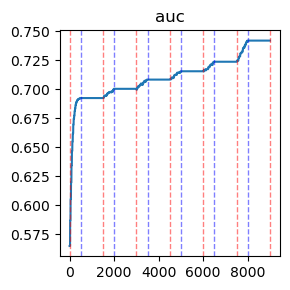



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7420369434737925


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:48:53 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

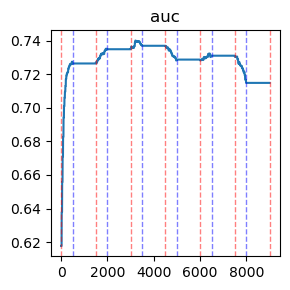



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7148015889003084


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:51:58 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

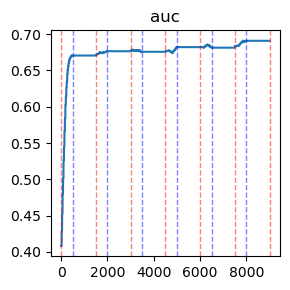



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6909064193216856


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:55:03 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

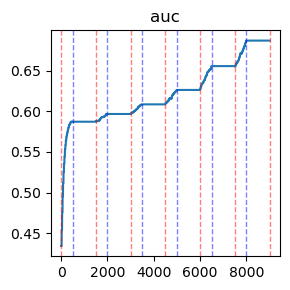



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6867954224049332


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 01:58:09 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

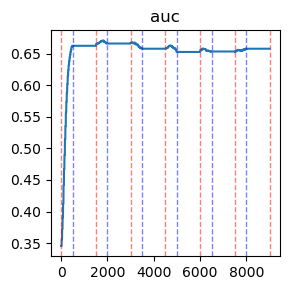



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6577615066803701


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:01:14 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

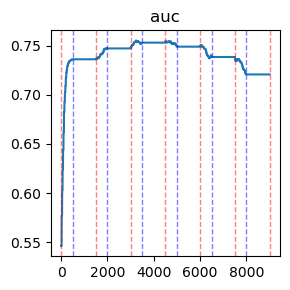



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7207111469681398


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:04:19 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

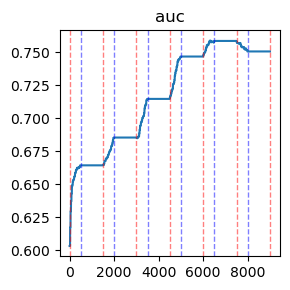



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.750772811921891


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:07:24 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

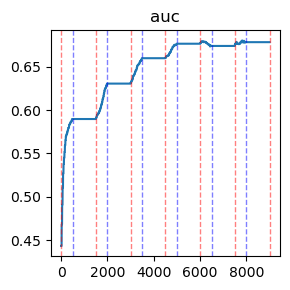



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6783164912641316


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:10:29 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

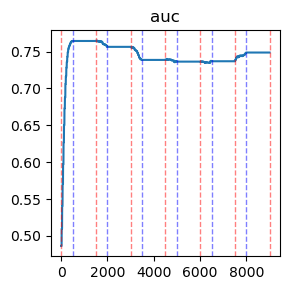



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.748717313463515


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:13:33 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

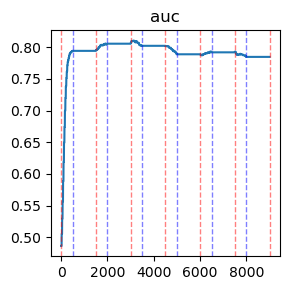



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7846885364850977


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:16:37 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

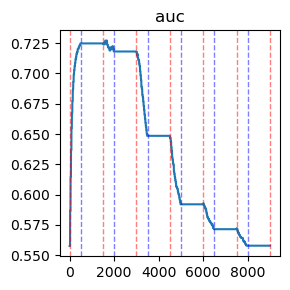



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5578128941418294


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:19:42 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

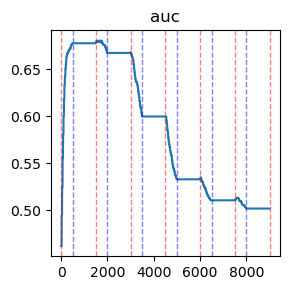



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5020574984583762


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:22:47 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

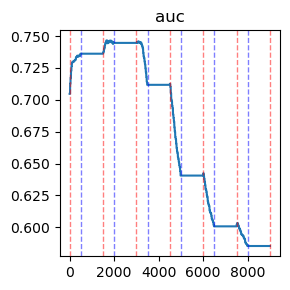



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5853051860226105


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:25:50 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

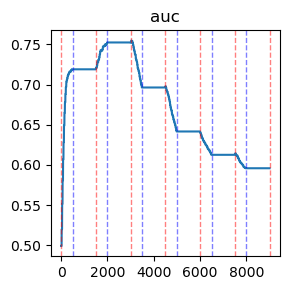



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5958396156217884


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:28:55 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

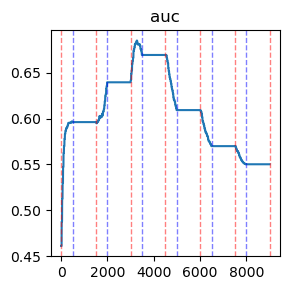



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5501047749229189


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:32:00 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1000,
        "lr": 1e-05,
        "noise_amp": 0.01,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

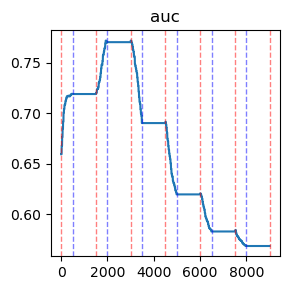



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.5683473237410073


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:35:04 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

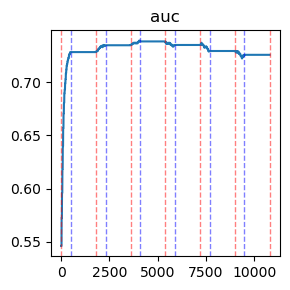



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7255929558067832


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:38:41 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

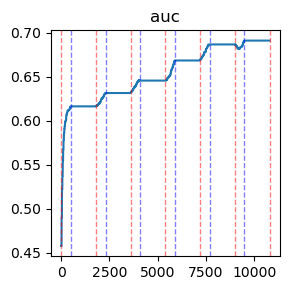



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.6911633566289825


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:42:21 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

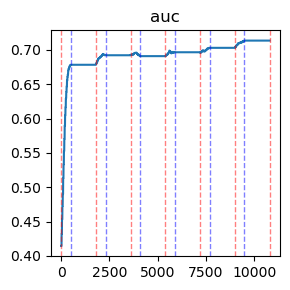



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7135169023638233


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:45:58 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

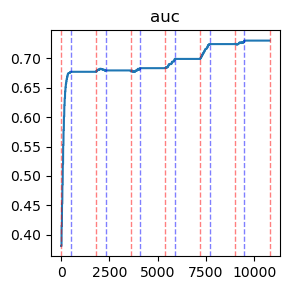



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7297039527235356


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:49:36 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

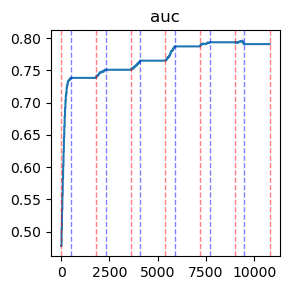



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7908550318602262


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:53:14 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

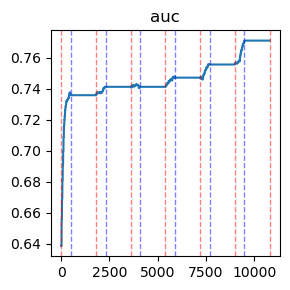



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7710708591983556


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 02:56:47 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

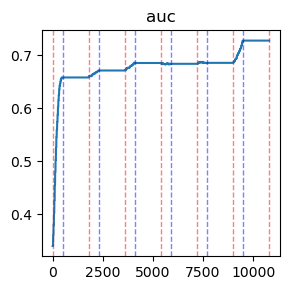



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7271345796505654


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:316:::  
 2024-09-27 03:00:20 starting optimization of piegam on texas on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 24,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 5e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_bac

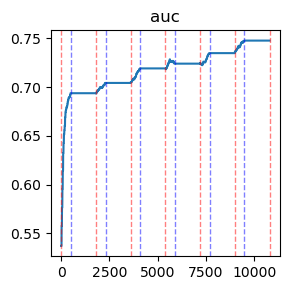



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  


FINISHED train 
 last accuracies:
auc: 0.7476895642343269


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:422:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/optimization_utils.py:272:::  

Finished CrossVal!




FileNotFoundError: [Errno 2] No such file or directory: '/home/user/Documents/danny/AAAI_pieclam/experiments/results/link_prediction/texas/piegam/acc_configs_3.json'

In [85]:

# dim_feats = [36, 40, 46, 50, 56, 60, 66, 70, 76, 80]
dim_feats = [24]
l1_regs = [1]
# l1_regs = [0.0, 0.01, 0.1, 1, 10]
# s_regs = [10, 1, 0.1, 0.01, 0.0]
s_regs = [0.0]
n_iters_feats = [500, 1000, 1300]
lr_feats = [3e-6, 5e-6]


n_iters_prior = [500, 1000, 1300]
lr_prior = [1e-6, 3e-6 , 1e-5]
noise_amps = [0.1, 0.05, 0.01]

scheduler_step_sizes = [1000]
n_back_forths = [10]

range_triplets = [
    ['clamiter_init', 'dim_feat', dim_feats],
    ['clamiter_init','s_reg', s_regs],
    ['clamiter_init','l1_reg', l1_regs],
    ['feat_opt','n_iter', n_iters_feats],
    ['feat_opt','lr', lr_feats],

    ['prior_opt','n_iter', n_iters_prior],
    ['prior_opt','lr', lr_prior],
    ['prior_opt','noise_amp', noise_amps],

    ['back_forth', 'scheduler_step_size', scheduler_step_sizes],
    ['back_forth', 'n_back_forth', n_back_forths]
]
#todo: how to default without the range triplets? if i just want to make optimization for many iterations on the mighty or the specialized?

#todo: why is the l1 reg not working
# Create the file if it doesn't exist
ds_name = 'texas'
model_name = 'pieclam'
global_config_base = True
densify = False
attr_opt = True
test_p = 0.1
val_p = 0.0

ou.cross_val_link(
    ds_name,
    model_name=model_name,
    range_triplets=range_triplets,
    global_config_base=global_config_base,
    densify=densify,
    attr_opt=attr_opt,
    test_p=test_p,
    val_p=val_p,
    device=device,
    n_reps=6
    )

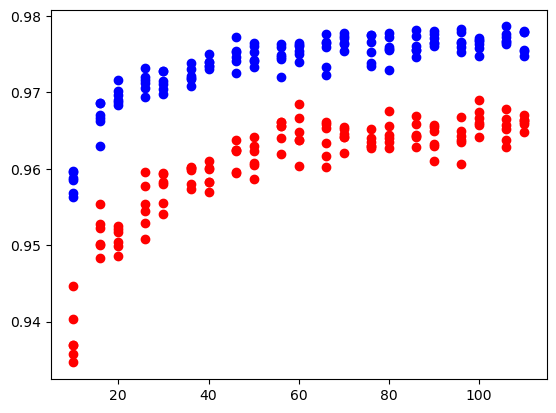

In [26]:
import matplotlib.pyplot as plt

# Extract the data for bigclam and ieclam
bigclam_data = acc_dict['bigclam']
ieclam_data = acc_dict['ieclam']

# Plot the data
for key in bigclam_data.keys():
    for data in bigclam_data[key]:
        plt.plot(key,data,'o', color='blue', label='bigclam', linestyle='none')
for key in ieclam_data.keys():
    for data in ieclam_data[key]:
        plt.plot(key,data, 'o', color='red', label='ieclam', linestyle='none')

# ithink maybe 40 for big and 80 for ie
    
    

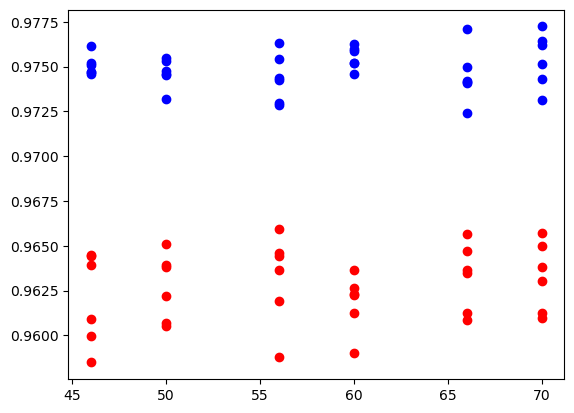

In [38]:
acc_dict
import matplotlib.pyplot as plt

# Extract the data for bigclam and ieclam
bigclam_data = acc_dict['bigclam']
ieclam_data = acc_dict['ieclam']

# Plot the data
for key in bigclam_data.keys():
    plt.plot(dim_feats, bigclam_data[key], 'o', color='blue', label='bigclam', linestyle='none')
    plt.plot(dim_feats, ieclam_data[key], 'o', color='red', label='ieclam', linestyle='none')
    

# plt.plot(dim_feats, bigclam_data, color='blue', label='bigclam')
# plt.plot(dim_feats, ieclam_data, color='red', label='ieclam')

# # Add labels and title
# plt.xlabel('Dim Feat')
# plt.ylabel('AUC')
# plt.title('AUC vs Dim Feat')

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()

In [25]:
acc_dict

{'bigclam': {36: [0.9727175209227668, 0.9723776342604988],
  40: [0.972267407076946, 0.9718492448404841],
  50: [0.9763531931124269, 0.9762211485460616]},
 'iegam': {36: [0.9655798708689162, 0.9567564327892888],
  40: [0.9570085710707769, 0.9578119610378143],
  50: [0.9598908052110603, 0.9617079782205947]}}

In [ ]:
#   'bigclam': {
#   10: [0.9585404724760899, 0.9639035086504821],
#   20: [0.9684866796298274, 0.9682561623880347],
#   30: [0.9715515773390894, 0.9679066481381807],
#   40: [0.973401410354128, 0.975028281881877]},
#  'ieclam': {
#   10: [0.9363348119751429, 0.9362004879243281],
#   20: [0.953740656284433, 0.9519222289221715],
#   30: [0.9568455111402209, 0.9550952164216329],
#   40: [0.9605243983039492, 0.9610890825556342]}}